<a href="https://colab.research.google.com/github/AjayKarthi14/DSML/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from scipy.stats import binom,norm,poisson,geom,expon

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. 

# Downloading Dataset

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:01<00:00, 14.0MB/s]


In [ ]:
df = pd.read_csv("walmart_data.csv?1641285094")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


# Basic Observations, value counts and unique values

In [ ]:
df.shape

(550068, 10)

In [ ]:
# There are around 550068 records of purchase transactions containing 10 different attributes and the purchase was done on a Black Friday
# 5 String and 5 integer type characteristics collected for each transaction
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Null values in each column
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
# Number of unique values for each 10 attribute / Column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
# Mean, Median, Percentile - 25:50:75, Min, Max and Standard Deviation of Integer type attributes
# Most of the integer attributes are categorical - User_ID, Occupation, Marital_Status, and Product_Category
# Purchase value ranges from  12 to 23961 with mean as 9263 and median as 8047
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# Unique Values in String type attribute and their respective modes/frequency
df.describe(include=object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
# Number of Male/Female in the provided dataset
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
# Count of individual's age groups 
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
# Count of city category 
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
# Count of Years of Stay
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
# Number of Single/Married in the provided dataset
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
# Count of purchase based on product category
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
# Count of Masked Occupation
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
# Count of purchase based on product id
df["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
# Given Female, City Category A,B and C contains 26.29%, 42.56% and 31.15% 
# Given Male, City Category A,B and C contains 27.04%, 41.85% and 31.11% 
pd.crosstab(index = df['Gender'] , columns = df['City_Category'] , margins = True , normalize = 'index')*100

City_Category,A,B,C
Gender,,,
F,26.289863,42.556826,31.153311
M,27.040088,41.852319,31.107592
All,26.854862,42.026259,31.118880


In [ ]:
# Given Female, Product Category most bought are 5, 8 and 1 with 30.90% , 24.71% and 18.28% respectively
# Given Male, Product Category most bought are 5, 8 and 1 with 26.31% , 19.40% and 27.89% respectively
pd.crosstab(index = df['Gender'] , columns = df['Product_Category'] , margins = True , normalize = 'index')*100

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,18.283766,4.166145,4.422387,2.679498,30.897069,3.356920,0.694358,24.709703,0.051543,0.855613,3.489459,1.128055,1.076512,0.458732,0.770199,1.768660,0.045652,0.281277,0.332084,0.532365
M,27.892454,4.394835,3.429497,1.958678,26.305282,3.839868,0.670595,19.400182,0.082074,0.956648,4.718787,0.582969,0.986581,0.217255,1.265875,1.792598,0.124560,0.662146,0.278087,0.441028
All,25.520118,4.338373,3.674637,2.136645,27.438971,3.720631,0.676462,20.711076,0.074536,0.931703,4.415272,0.717548,1.008784,0.276875,1.143495,1.786688,0.105078,0.568112,0.291419,0.463579


In [ ]:
# Given Female, Age category representation of 18-25, 26-35 and 36-45 are 18.13% , 37.37% and 20.01% respectively
# Given Male, Age category representation of 18-25, 26-35 and 36-45 are 18.11% , 40.76% and 20.00% respectively
pd.crosstab(index = df['Gender'] , columns = df['Age'] , margins = True , normalize = 'index')*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,3.742756,18.134292,37.370130,20.006038,9.718796,7.285231,3.742756
M,2.418535,18.112340,40.755904,19.997876,7.845816,6.905583,3.963945
All,2.745479,18.117760,39.919974,19.999891,8.308246,6.999316,3.909335


In [ ]:
# Given male or female , percentage of individual in that particular Occupation
pd.crosstab(index = df['Gender'] , columns = df['Occupation'] , margins = True , normalize = 'index')*100

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,,
F,13.336377,13.242127,6.353776,5.830983,13.133150,1.634649,6.008438,7.383899,0.265814,4.302366,...,1.104492,2.554323,1.103020,4.979788,1.759824,3.024100,2.893034,0.169355,1.485174,6.487788
M,12.438112,7.107148,4.335211,2.349014,13.149262,2.403569,2.943811,11.853695,0.286053,0.108145,...,2.434709,6.689052,1.503890,4.959699,2.359635,5.133021,8.717735,1.542996,1.555549,5.974765
All,12.659889,8.621843,4.833584,3.208694,13.145284,2.213726,3.700452,10.750125,0.281056,1.143677,...,2.106285,5.668208,1.404917,4.964659,2.211545,4.612339,7.279645,1.203851,1.538173,6.101427


In [ ]:
# 60:40 ratio of single to married in both male and female
pd.crosstab(index = df['Gender'] , columns = df['Marital_Status'] , margins = True , normalize = 'index')*100

Marital_Status,0,1
Gender,,
F,58.038127,41.961873
M,59.361414,40.638586
All,59.034701,40.965299


In [ ]:
# Given Female, Stay_In_Current_City_Years 1,2 and 3 years contains 37.77%, 17.92% and 18.05% 
# Given Male, Stay_In_Current_City_Years 1,2 and 3 years contains 34.04%, 18.71% and 17.08% 
pd.crosstab(index = df['Gender'] , columns = df['Stay_In_Current_City_Years'] , margins = True , normalize = 'index')*100

Stay_In_Current_City_Years,0,1,2,3,4+
Gender,,,,,
F,12.563969,37.772165,17.916338,18.054768,13.692760
M,13.840375,34.404322,18.709551,17.082308,15.963443
All,13.525237,35.235825,18.513711,17.322404,15.402823


In [ ]:
# Given Single, Age category representation of 18-25, 26-35 and 36-45 are 24.19% , 41.05% and 20.44% respectively
# Given Married, Age category representation of 18-25, 26-35 and 36-45 are 09.37% , 38.29% and 19.36% respectively
pd.crosstab(index = df['Marital_Status'] , columns = df['Age'] , margins = True , normalize = 'index')*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Marital_Status,,,,,,,
0,4.650619,24.187404,41.048129,20.440611,3.907850,3.337840,2.427548
1,0.000000,9.370853,38.294199,19.364774,14.649614,12.275836,6.044724
All,2.745479,18.117760,39.919974,19.999891,8.308246,6.999316,3.909335


In [ ]:
# Given Single, Product Category most bought are 5, 8 and 1 with 27.61% , 20.14% and 25.98% respectively
# Given Married, Product Category most bought are 5, 8 and 1 with 27.19% , 21.53% and 24.85% respectively
pd.crosstab(index = df['Marital_Status'] , columns = df['Product_Category'] , margins = True , normalize = 'index')*100

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Marital_Status,,,,,,,,,,,,,,,,,,,,
0,25.983044,4.353757,3.805919,2.210137,27.609314,3.738171,0.628212,20.143134,0.076063,0.855477,4.516969,0.626365,0.973729,0.260523,1.115693,1.759302,0.091768,0.505341,0.291318,0.455762
1,24.852998,4.316202,3.485446,2.030736,27.193492,3.695354,0.745994,21.529531,0.072336,1.041551,4.268718,0.848951,1.059302,0.300439,1.183561,1.826154,0.124258,0.658569,0.291563,0.474844
All,25.520118,4.338373,3.674637,2.136645,27.438971,3.720631,0.676462,20.711076,0.074536,0.931703,4.415272,0.717548,1.008784,0.276875,1.143495,1.786688,0.105078,0.568112,0.291419,0.463579


# Univariate Data Analysis and Visualisation

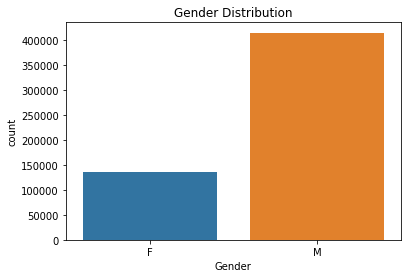

In [ ]:
# Count plot on the Gender
sns.countplot(x = 'Gender' , data = df)
plt.title("Gender Distribution")
plt.show()

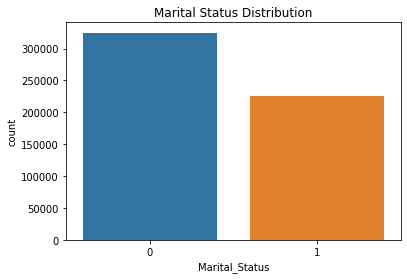

In [ ]:
# Count plot on the Martial Status
sns.countplot(x = 'Marital_Status' , data = df)
plt.title("Marital Status Distribution")
plt.show()

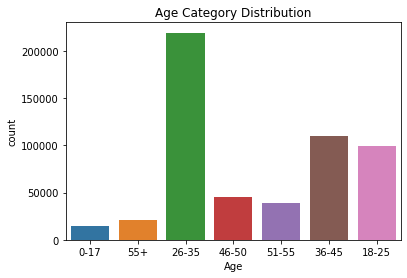

In [ ]:
# Count plot on the Age Category
# Individuals aged between 18-45 tend to buy more as a whole
sns.countplot(x = 'Age' , data = df)
plt.title("Age Category Distribution")
plt.show()

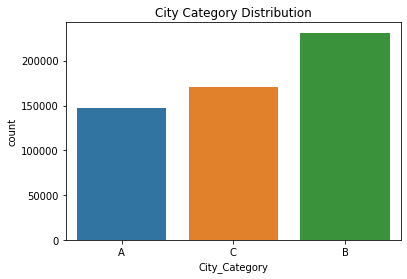

In [ ]:
# Count plot on the City Category (B > C > A)
sns.countplot(x = 'City_Category' , data = df)
plt.title("City Category Distribution")
plt.show()

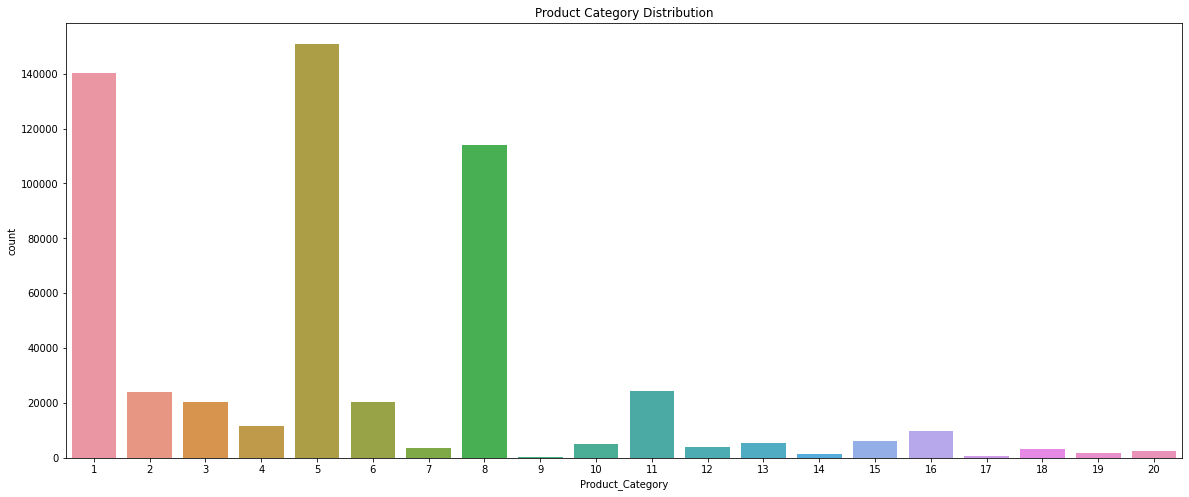

In [ ]:
# Count plot on the Product Category(Masked)
# Product Category 1,5 and 8 tend to be the most popular category among buyers
plt.figure(figsize = (20,8))
sns.countplot(x = 'Product_Category' , data = df)
plt.title("Product Category Distribution")
plt.show()

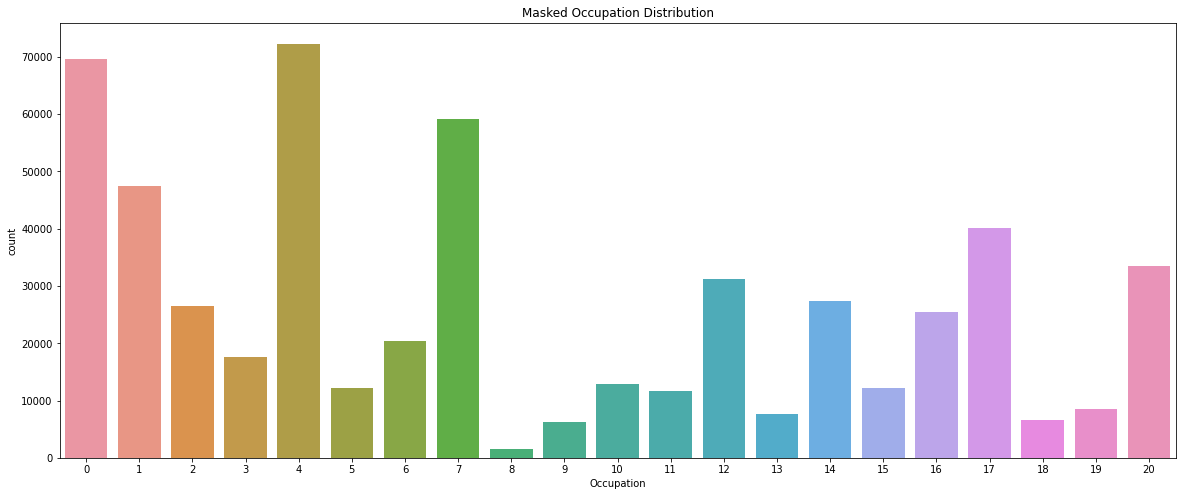

In [ ]:
# Count plot on the Occupation(Masked)
plt.figure(figsize = (20,8))
sns.countplot(x = 'Occupation' , data = df)
plt.title("Masked Occupation Distribution")
plt.show()

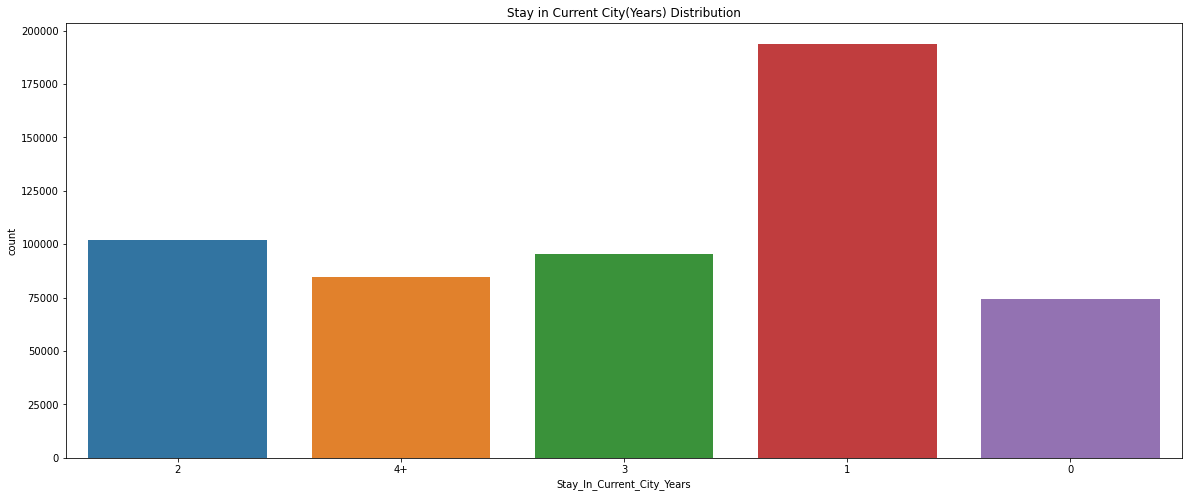

In [ ]:
# Count plot on the Stay in City(Years)
plt.figure(figsize = (20,8))
sns.countplot(x = 'Stay_In_Current_City_Years' , data = df)
plt.title("Stay in Current City(Years) Distribution")
plt.show()

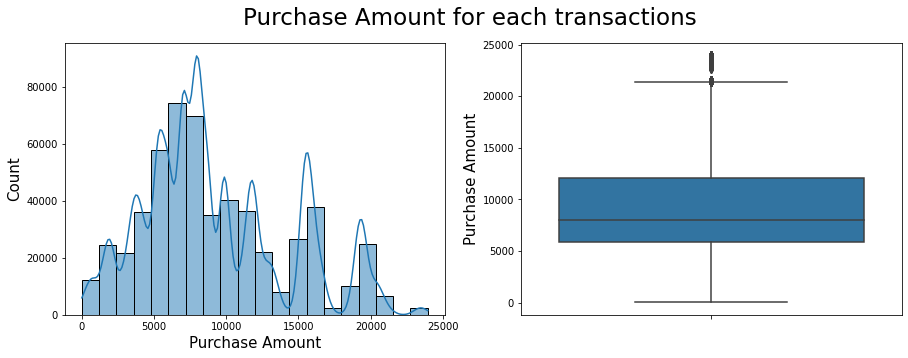

In [ ]:
# Purchase Amount for each transactions 
# 50% of the transactions lie in the range of 5500 - 12500
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(x = df['Purchase'] , bins = 20 , kde = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Purchase Amount' , fontsize = 15)
plt.ylabel('Count' , fontsize = 15)

plt.subplot(1,2,2)
sns.boxplot(y = df['Purchase'])
plt.yticks(fontsize = 10)
plt.ylabel('Purchase Amount' , fontsize = 15)

fig.suptitle("Purchase Amount for each transactions" , fontsize = 23)
plt.show()

# Bivariate and multivariate Visualisation

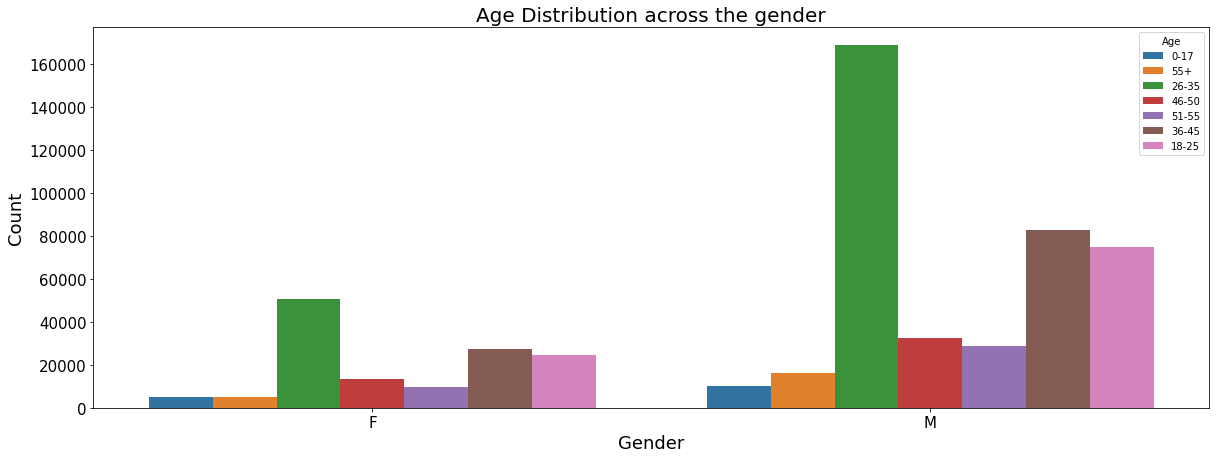

In [ ]:
# Age Category Distribution across Gender
plt.figure(figsize = (20,7))
sns.countplot(x = 'Gender' , data = df , hue = 'Age')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Gender' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Age Distribution across the gender" , fontsize = 20)
plt.show()

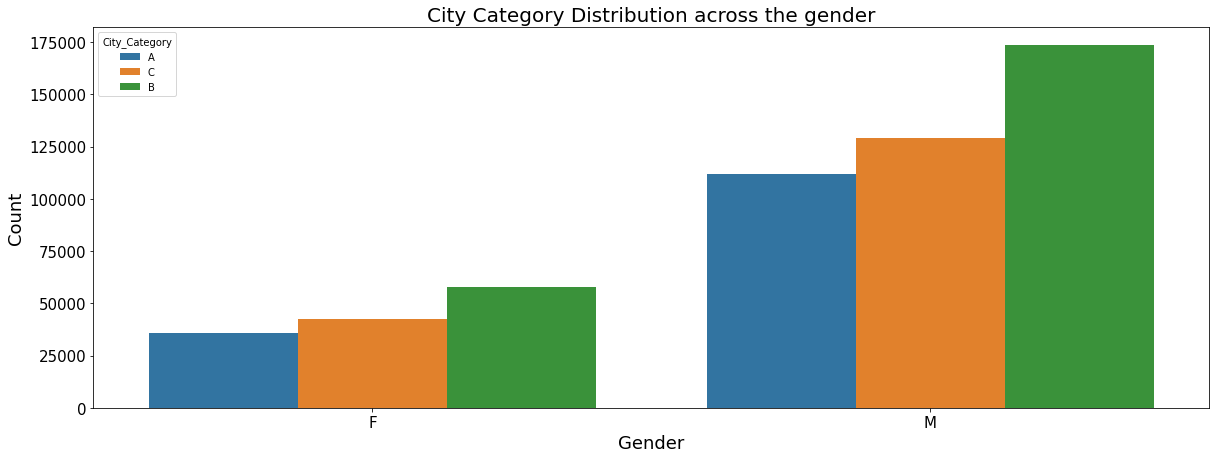

In [ ]:
# City Category Distribution across the gender
plt.figure(figsize = (20,7))
sns.countplot(x = 'Gender' , data = df , hue = 'City_Category')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Gender' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("City Category Distribution across the gender" , fontsize = 20)
plt.show()

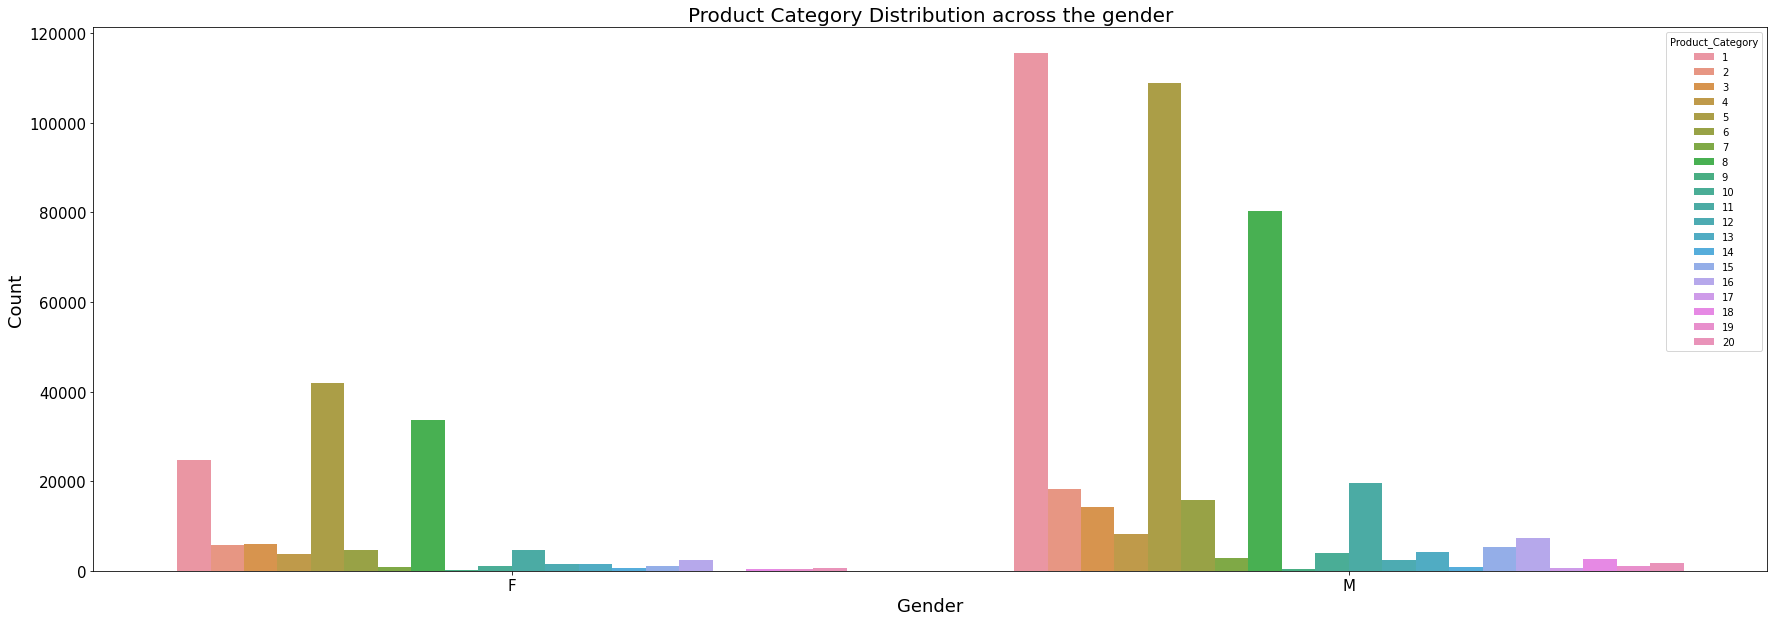

In [ ]:
# Product Category Distribution across the gender
plt.figure(figsize = (30,10))
sns.countplot(x = 'Gender' , data = df , hue = 'Product_Category')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Gender' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Product Category Distribution across the gender" , fontsize = 20)
plt.show()

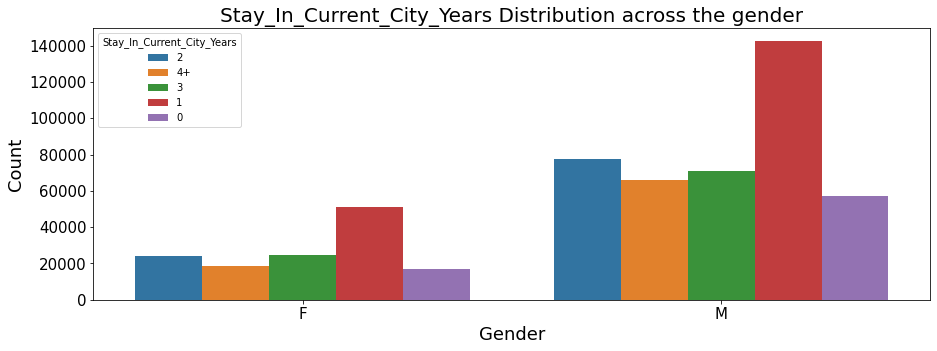

In [ ]:
# Stay_In_Current_City_Years Distribution across the gender
plt.figure(figsize = (15,5))
sns.countplot(x = 'Gender' , data = df , hue = 'Stay_In_Current_City_Years')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Gender' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Stay_In_Current_City_Years Distribution across the gender" , fontsize = 20)
plt.show()

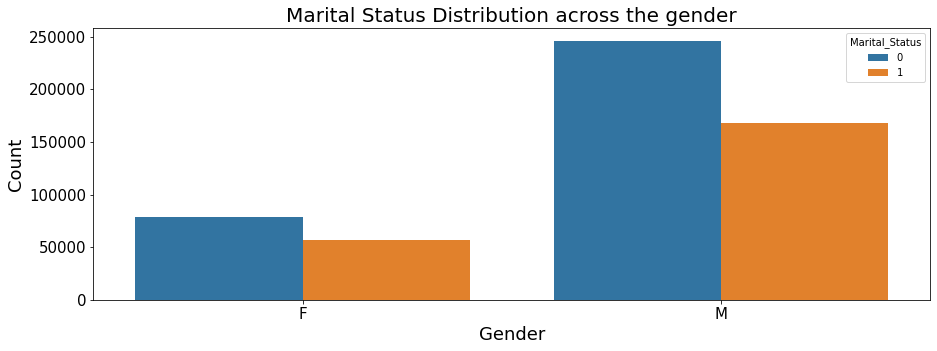

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Gender' , data = df , hue = 'Marital_Status')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Gender' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Marital Status Distribution across the gender" , fontsize = 20)
plt.show()

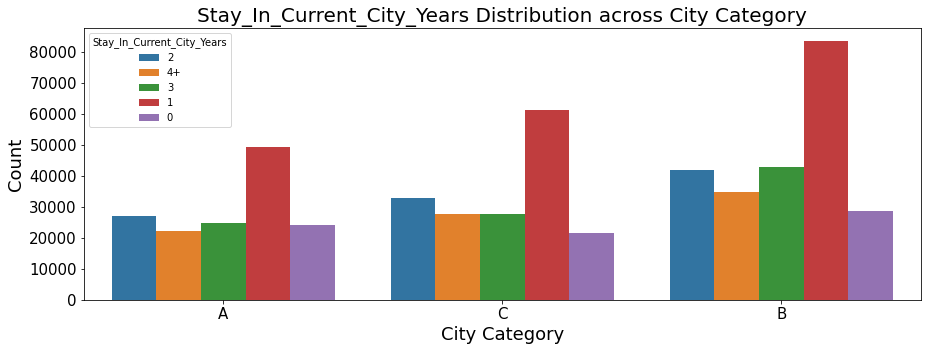

In [ ]:
# Stay_In_Current_City_Years Distribution across City Category
plt.figure(figsize = (15,5))
sns.countplot(x = 'City_Category' , data = df , hue = 'Stay_In_Current_City_Years')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('City Category' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Stay_In_Current_City_Years Distribution across City Category" , fontsize = 20)
plt.show()

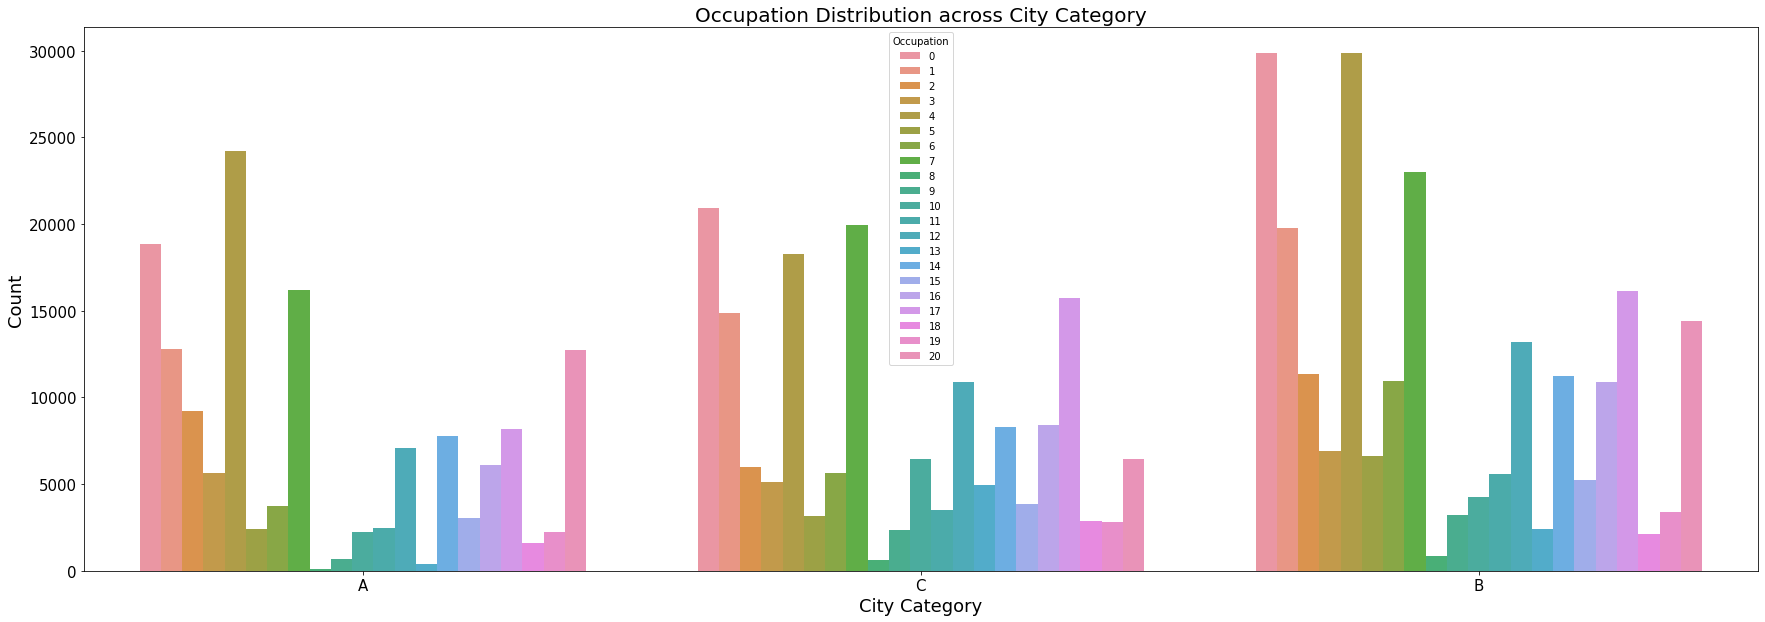

In [ ]:
# Occupation Distribution across City Category
plt.figure(figsize = (30,10))
sns.countplot(x = 'City_Category' , data = df , hue = 'Occupation')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('City Category' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Occupation Distribution across City Category" , fontsize = 20)
plt.show()

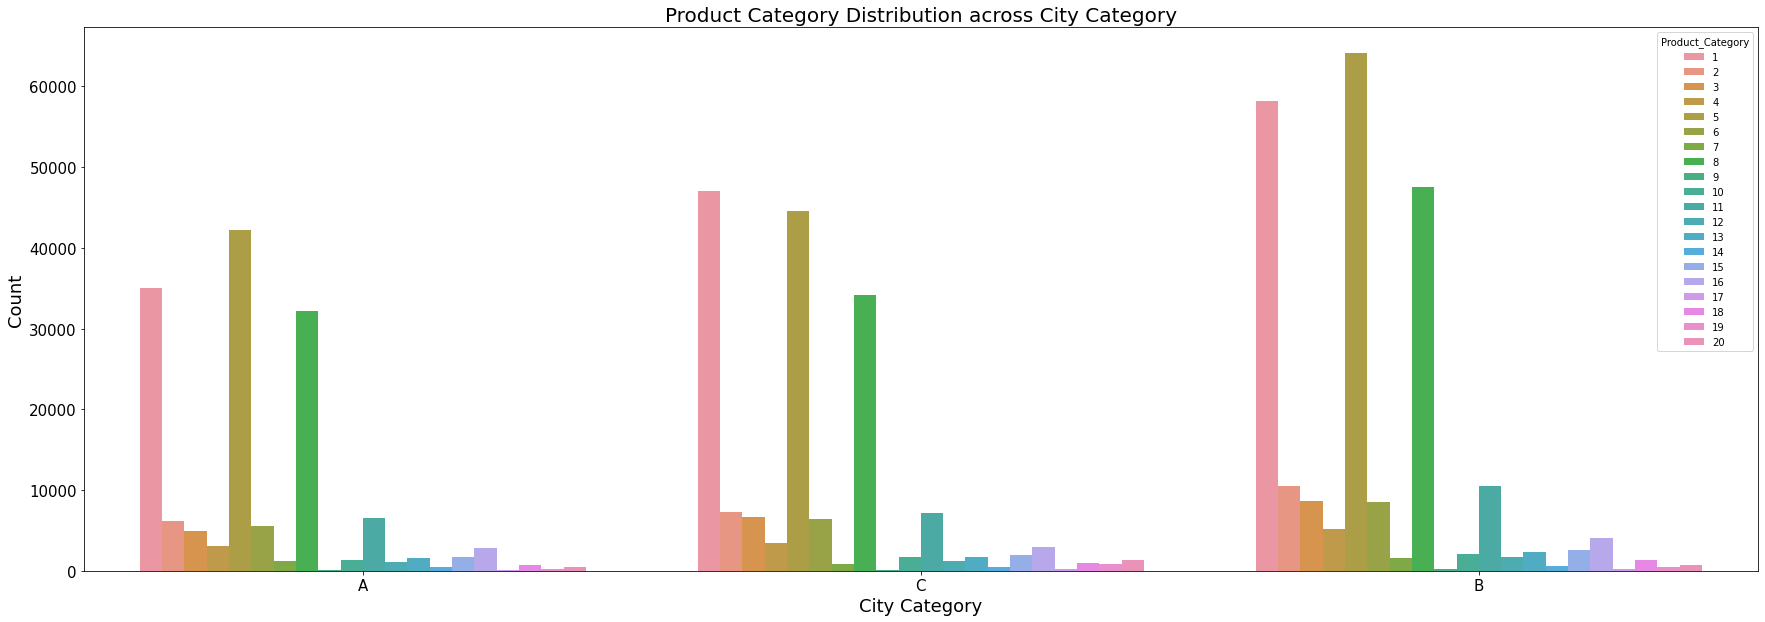

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'City_Category' , data = df , hue = 'Product_Category')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('City Category' , fontsize = 18)
plt.ylabel('Count' , fontsize = 18)
plt.title("Product Category Distribution across City Category" , fontsize = 20)
plt.show()

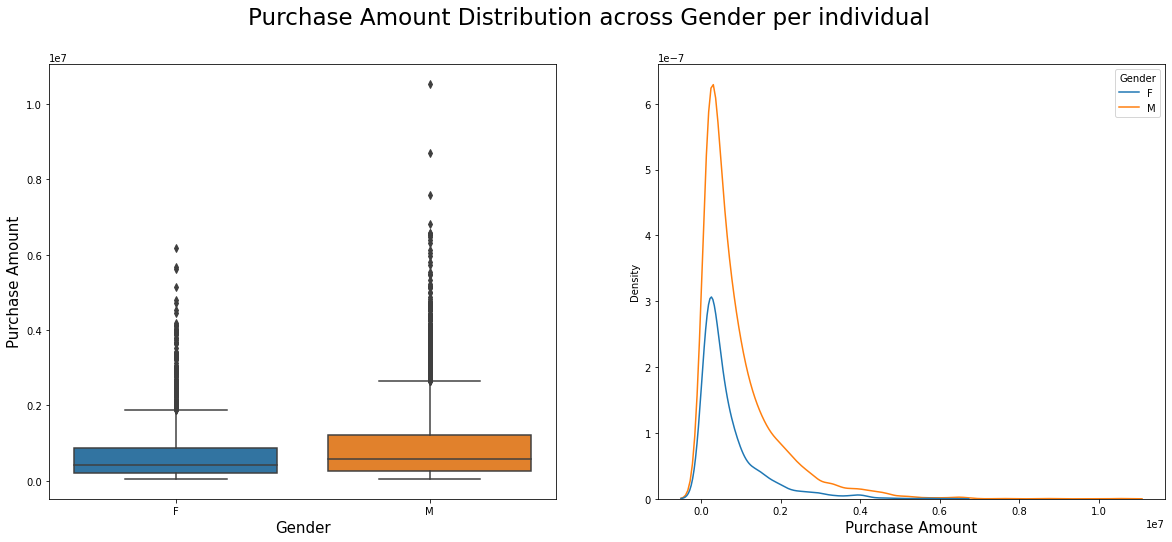

In [ ]:
# Purchase Amount Distribution across Gender per individual user id and outliers 
df_user = pd.DataFrame(data = df.groupby(['User_ID','Gender'])['Purchase'].sum())
df_user.reset_index(inplace = True)
fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.boxplot(y = 'Purchase' , data = df_user , x = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Gender' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)

plt.subplot(1,2,2)
sns.kdeplot(x = 'Purchase' , data = df_user , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.xlabel('Purchase Amount' , fontsize = 15)

fig.suptitle("Purchase Amount Distribution across Gender per individual" , fontsize = 23)
plt.show()

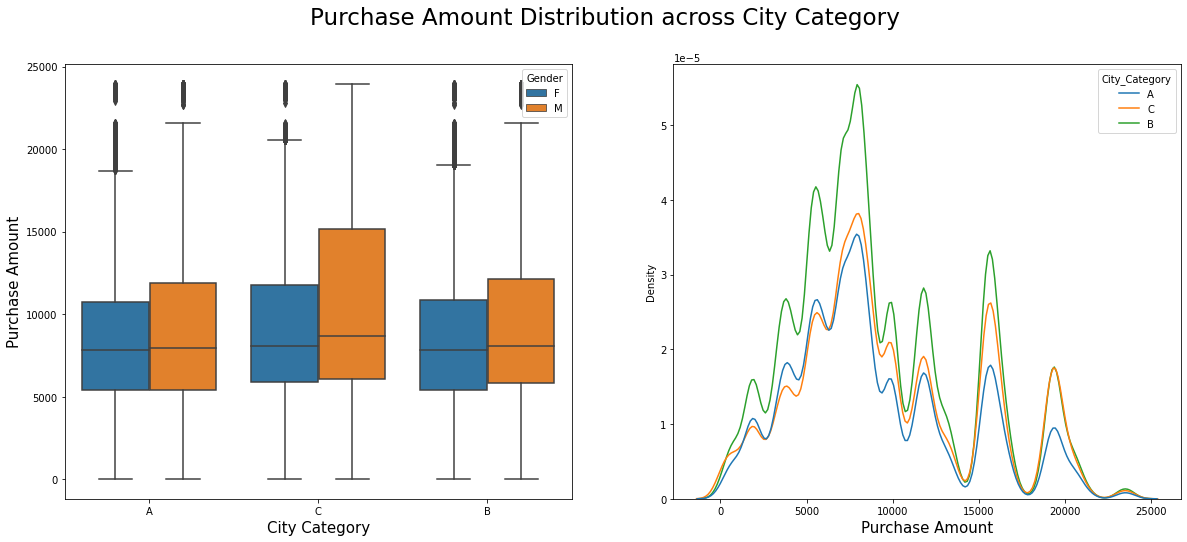

In [ ]:
# Purchase Amount Distribution across City Category and outliers 
fig = plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.boxplot(y = 'Purchase' , data = df , x = 'City_Category' , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('City Category' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)

plt.subplot(1,2,2)
sns.kdeplot(x = 'Purchase' , data = df , hue = 'City_Category')
plt.xticks(fontsize = 10)
plt.xlabel('Purchase Amount' , fontsize = 15)

fig.suptitle("Purchase Amount Distribution across City Category" , fontsize = 23)
plt.show()

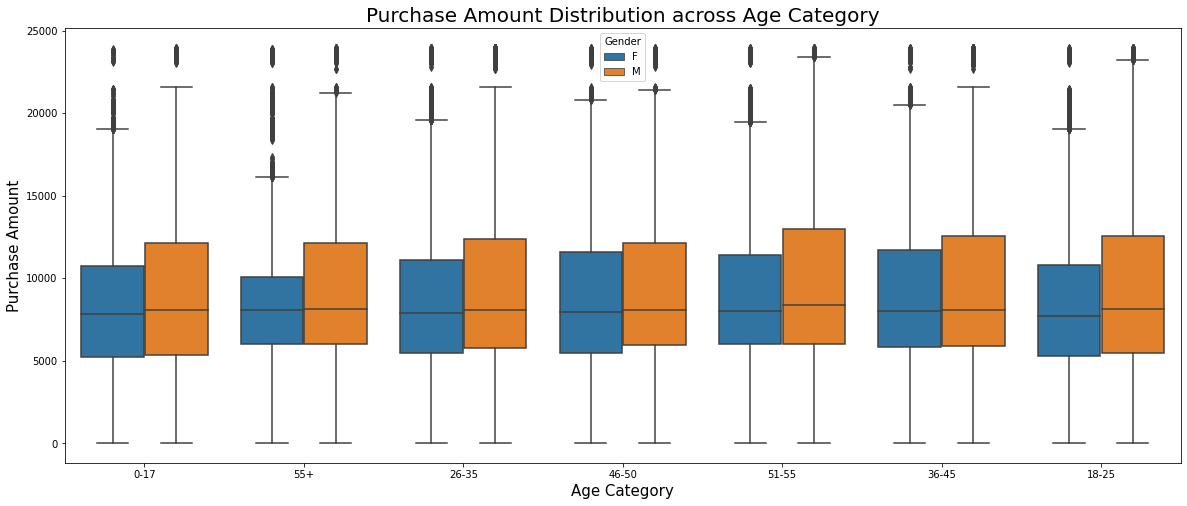

In [ ]:
# Purchase Amount Distribution across Age Category and the outlier amounts
fig = plt.figure(figsize = (20,8))
sns.boxplot(y = 'Purchase' , data = df , x = 'Age' , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Age Category' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Purchase Amount Distribution across Age Category" , fontsize = 20)
plt.show()

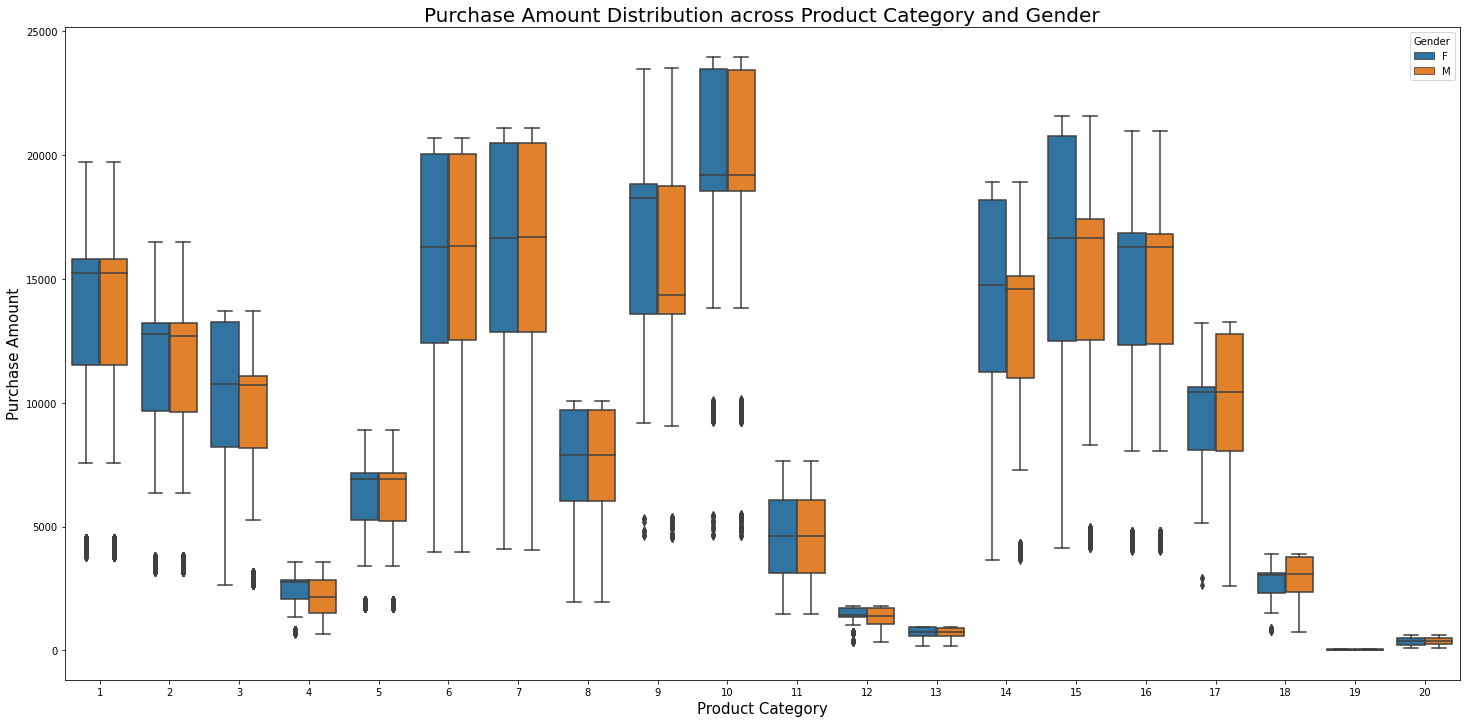

In [ ]:
# Purchase Amount Distribution across Product Category and the outlier amounts
fig = plt.figure(figsize = (25,12))
sns.boxplot(y = 'Purchase' , data = df , x = 'Product_Category' , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product Category' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Purchase Amount Distribution across Product Category and Gender" , fontsize = 20)
plt.show()

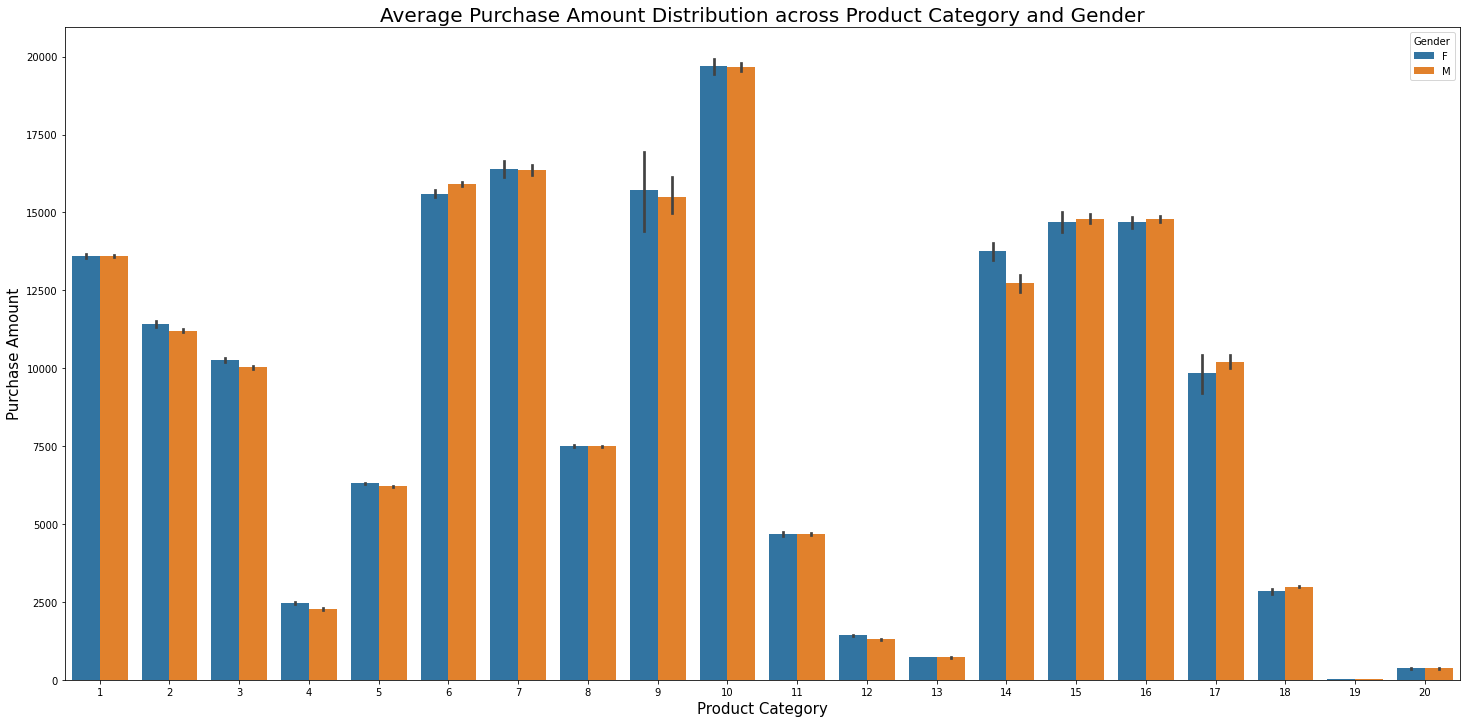

In [ ]:
# Average Purchase Amount Distribution across Product Category and Gender
fig = plt.figure(figsize = (25,12))
sns.barplot(y = 'Purchase' , data = df , x = 'Product_Category', estimator = np.mean , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product Category' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Average Purchase Amount Distribution across Product Category and Gender" , fontsize = 20)
plt.show()

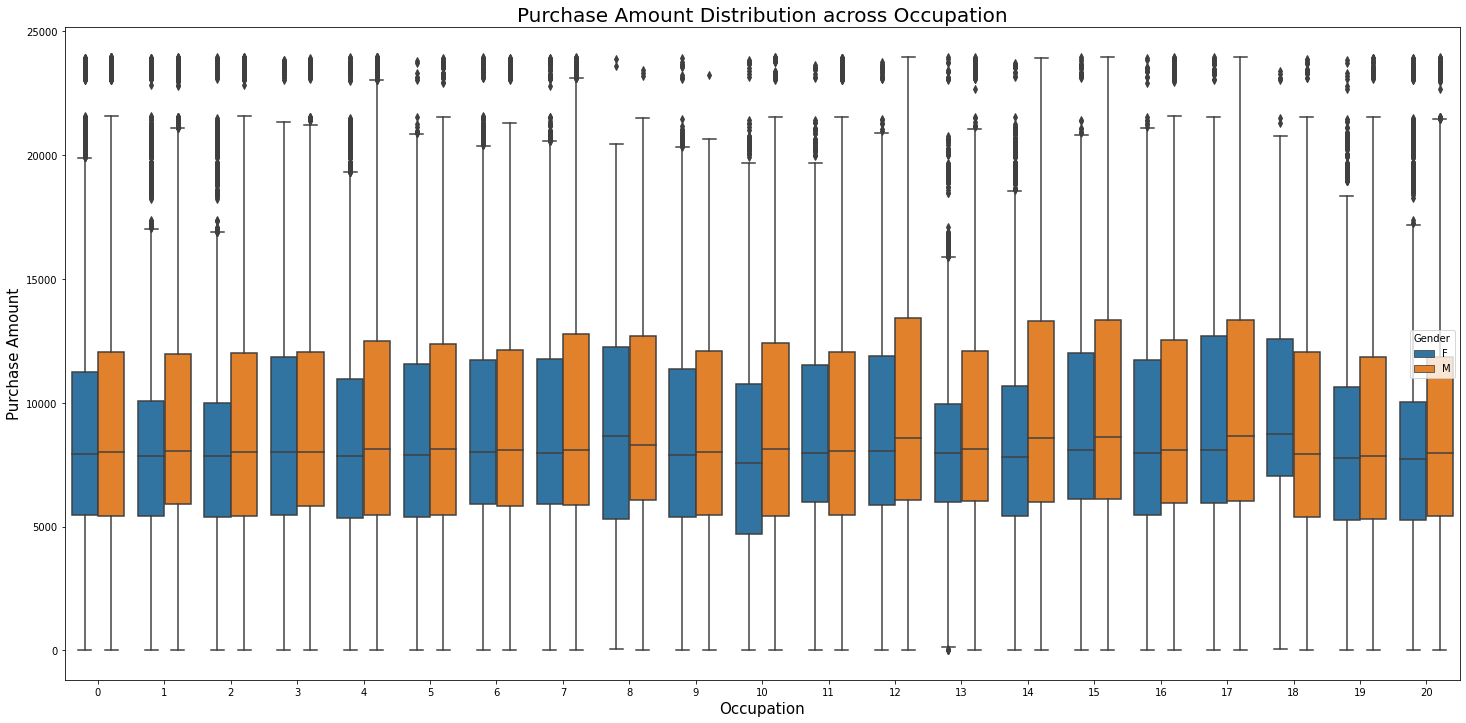

In [ ]:
# Purchase Amount Distribution across Occupation and the outlier amounts
fig = plt.figure(figsize = (25,12))
sns.boxplot(y = 'Purchase' , data = df , x = 'Occupation' , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Occupation' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Purchase Amount Distribution across Occupation" , fontsize = 20)
plt.show()

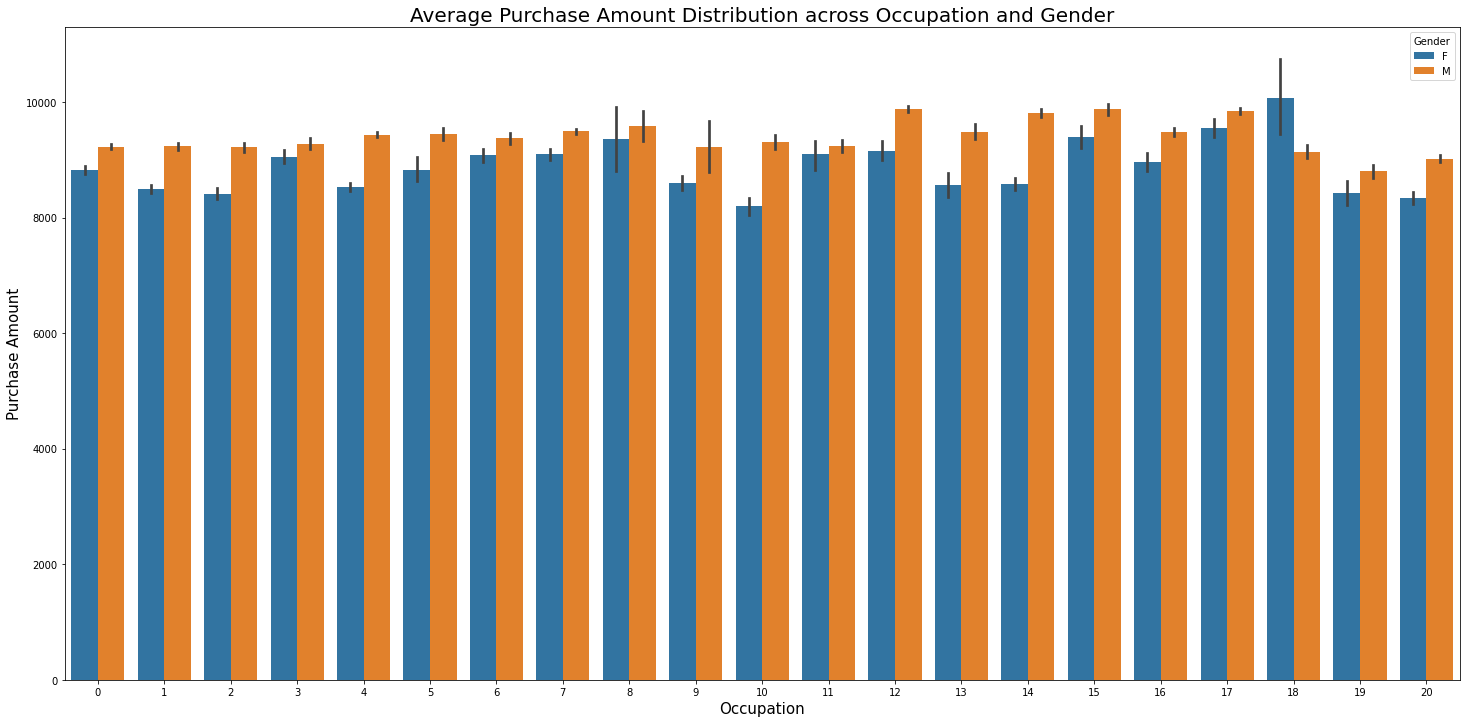

In [ ]:
# Average Purchase Amount Distribution across Occupation and Gender
fig = plt.figure(figsize = (25,12))
sns.barplot(y = 'Purchase' , data = df , x = 'Occupation', estimator = np.mean , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Occupation' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Average Purchase Amount Distribution across Occupation and Gender" , fontsize = 20)
plt.show()

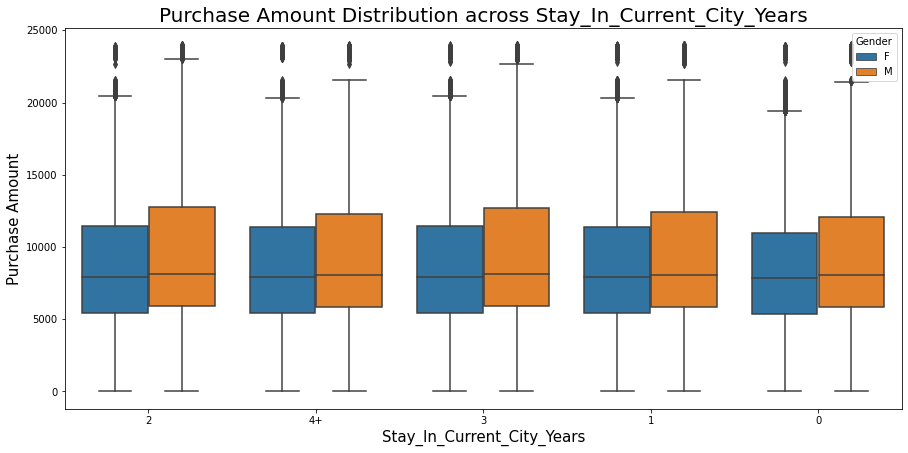

In [ ]:
# Purchase Amount Distribution across Occupation and the outlier purchase amount values
fig = plt.figure(figsize = (15,7))
sns.boxplot(y = 'Purchase' , data = df , x = 'Stay_In_Current_City_Years' , hue = 'Gender')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Stay_In_Current_City_Years' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Purchase Amount Distribution across Stay_In_Current_City_Years" , fontsize = 20)
plt.show()

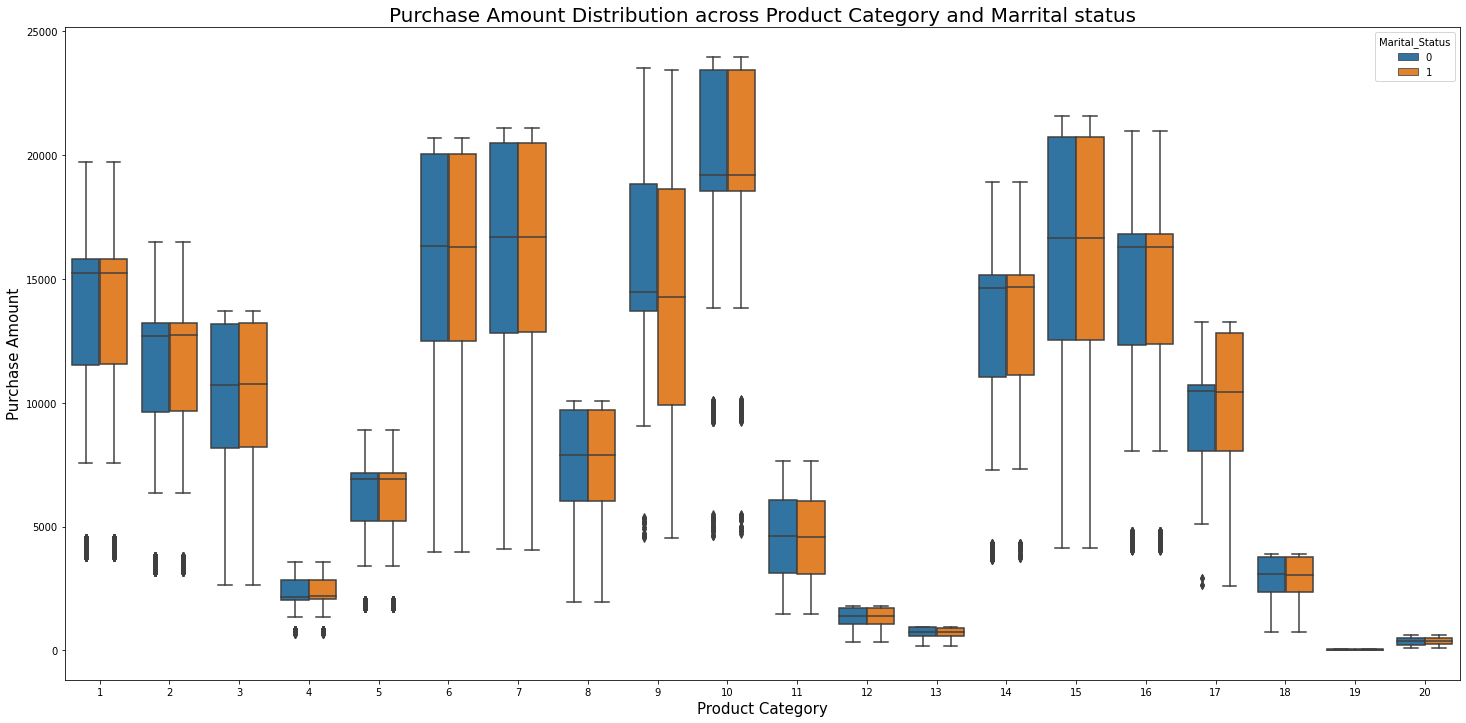

In [ ]:
# Purchase Amount Distribution across Product Category and Gender; and the outlier purchase amount values
fig = plt.figure(figsize = (25,12))
sns.boxplot(y = 'Purchase' , data = df , x = 'Product_Category' , hue = 'Marital_Status')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product Category' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Purchase Amount Distribution across Product Category and Marrital status" , fontsize = 20)
plt.show()

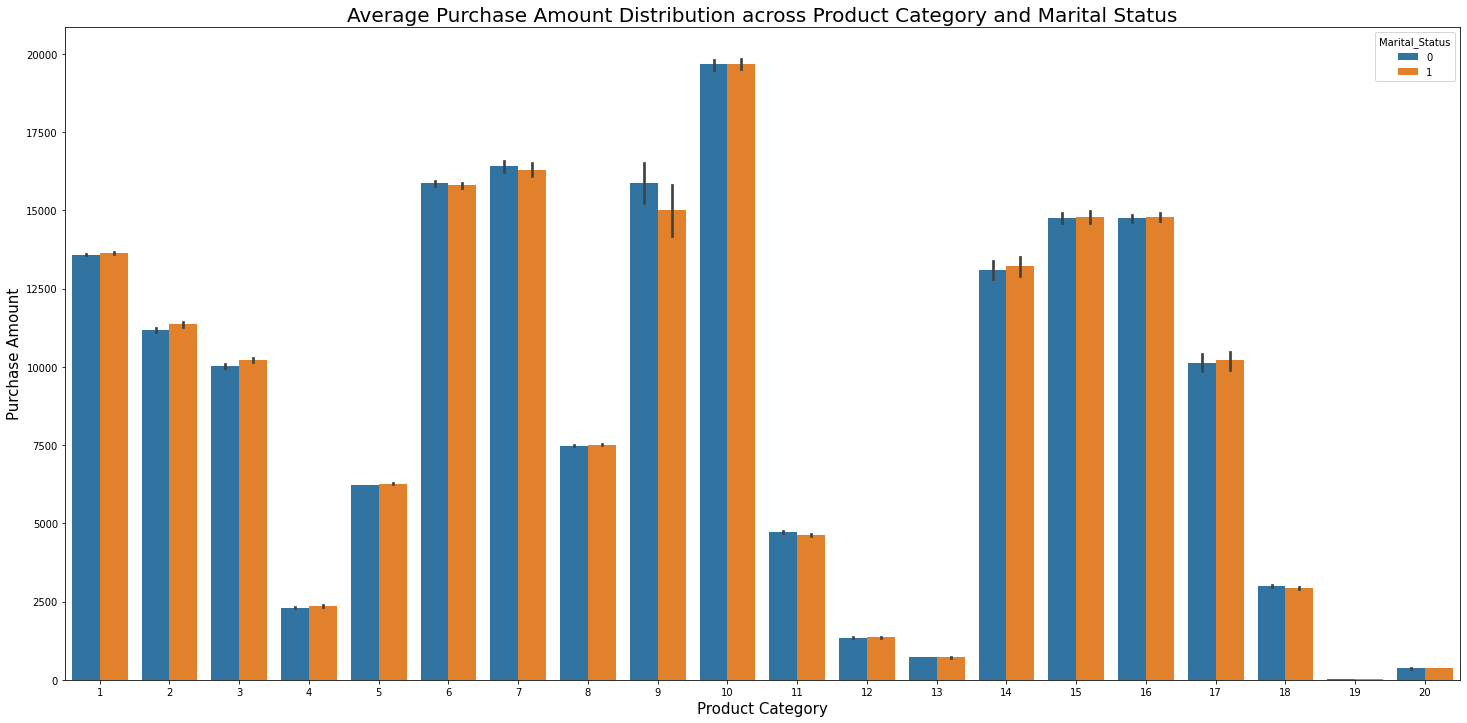

In [ ]:
# Average Purchase Amount Distribution across Product Category and Marital Status
fig = plt.figure(figsize = (25,12))
sns.barplot(y = 'Purchase' , data = df , x = 'Product_Category', estimator = np.mean , hue = 'Marital_Status')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Product Category' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Average Purchase Amount Distribution across Product Category and Marital Status" , fontsize = 20)
plt.show()

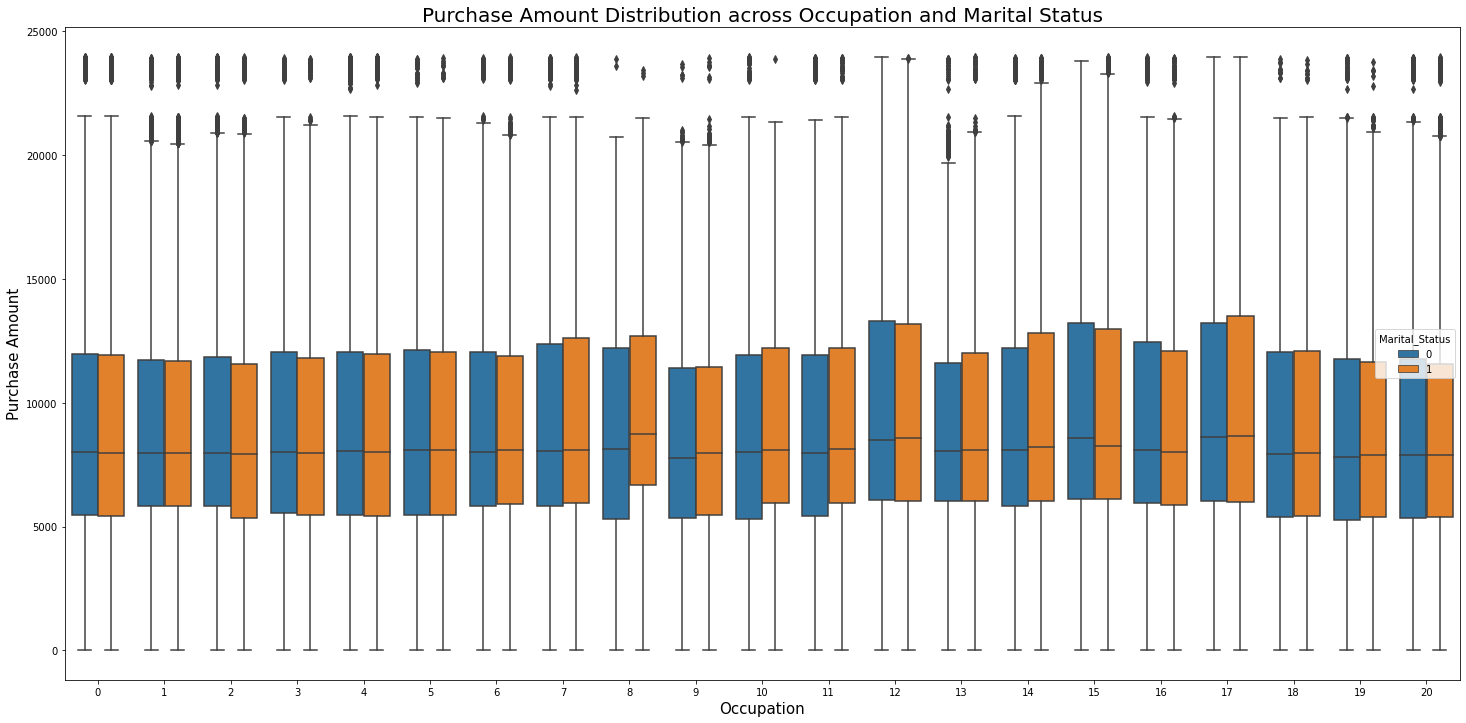

In [ ]:
# Purchase Amount Distribution across Occupation and marital Status and the outlier purchase amount values
fig = plt.figure(figsize = (25,12))
sns.boxplot(y = 'Purchase' , data = df , x = 'Occupation' , hue = 'Marital_Status')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Occupation' , fontsize = 15)
plt.ylabel('Purchase Amount' , fontsize = 15)
plt.title("Purchase Amount Distribution across Occupation and Marital Status" , fontsize = 20)
plt.show()

# Correlation - heatmaps & pairplots

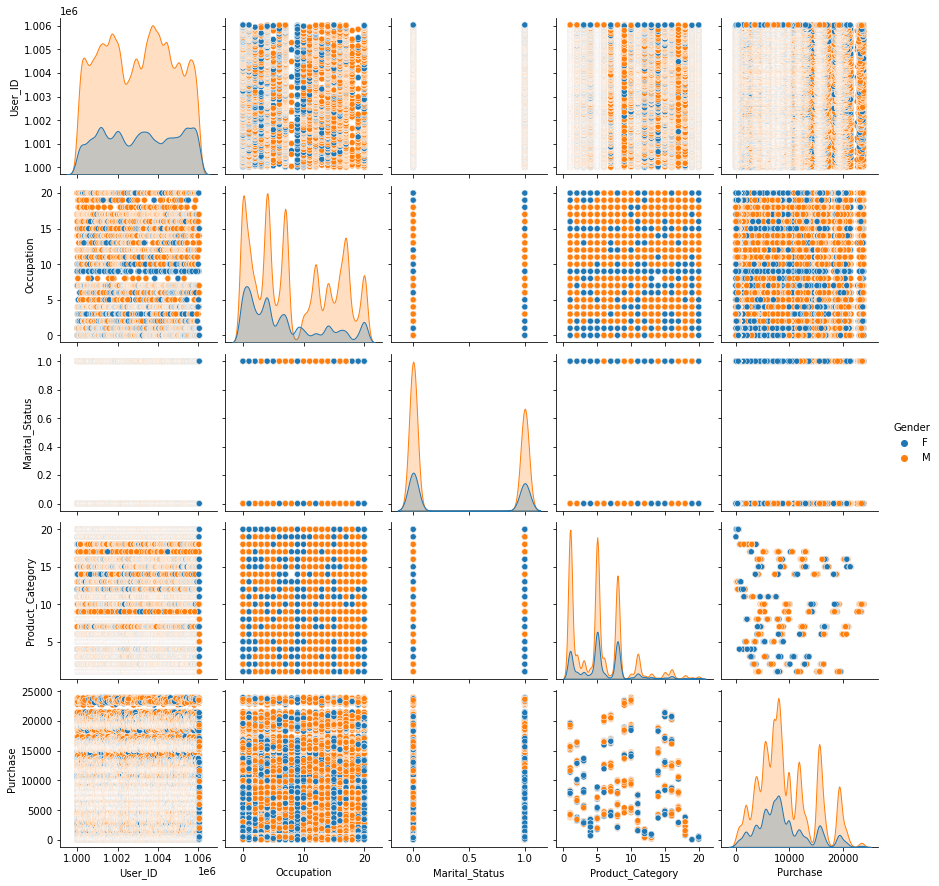

In [ ]:
sns.pairplot(data=df ,hue = 'Gender')
plt.show()

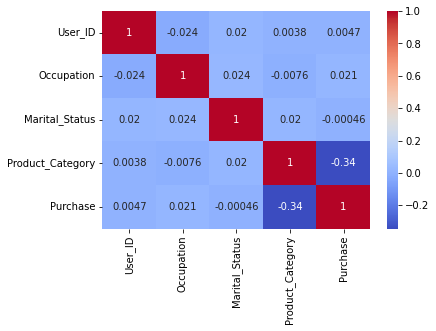

In [ ]:
# No correlation between any pair of attributes.
sns.heatmap(df.corr(), cmap= "coolwarm", annot=True)
plt.show()

# CLT and Confidence Interval

In [ ]:
# Z score calculation for 90% , 95% and 99% confidence interval
print("90% confidence interval Z-score values" , round(norm.ppf(0.05),3) , round(norm.ppf(0.95),3))
print("95% confidence interval Z-score values" , round(norm.ppf(0.025),3) , round(norm.ppf(0.975),3))
print("99% confidence interval Z-score values" , round(norm.ppf(0.005),3) , round(norm.ppf(0.995),3))

90% confidence interval Z-score values -1.645 1.645
95% confidence interval Z-score values -1.96 1.96
99% confidence interval Z-score values -2.576 2.576


In [ ]:
# Seperate datasets for male and female as df_male and df_female respectively and Calculating confidence interval for the average transaction value for male and female
z90 = 1.645
z95 = 1.96
z99 = 2.576
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']

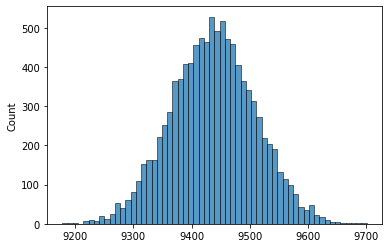

In [ ]:
# Survey Count : 10,000  Sample Count in each Survey : 5,000 :--: Calulating the mean for each survey(10,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for male
num_transact = 5000
num_people = 10000
male_sample_means = []
for person in range(num_people):
    male_sample = df_male["Purchase"].sample(num_transact)
    male_sample_mean = np.mean(male_sample)
    male_sample_means.append(male_sample_mean)
sns.histplot(male_sample_means)

In [ ]:
print("Mean of Sample_means and whole data for male : ",np.mean(male_sample_means), " , " , df_male['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for male : ",np.std(male_sample_means), " , ", df_male['Purchase'].std())
print("Standard Error for male : " , df_male['Purchase'].std()/m.sqrt(5000))

Mean of Sample_means and whole data for male :  9436.745801140001  ,  9437.526040472265
Standard Deviation for sample_means and whole data for male :  71.79786859314287  ,  5092.18620977797
Standard Error for male :  72.01438799997251


In [ ]:
obs_mean = df_male['Purchase'].mean()

left_90 =  - z90 * df_male['Purchase'].std()/m.sqrt(5000) + obs_mean
right_90 = z90 * df_male['Purchase'].std()/m.sqrt(5000) + obs_mean

left_95 =  - z95 * df_male['Purchase'].std()/m.sqrt(5000) + obs_mean
right_95 = z95 * df_male['Purchase'].std()/m.sqrt(5000) + obs_mean

left_99 =  - z99 * df_male['Purchase'].std()/m.sqrt(5000) + obs_mean
right_99 = z99 * df_male['Purchase'].std()/m.sqrt(5000) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9437.526040472265 lies between [9319.062372212311, 9555.989708732219]
With 95% confidence interval, we can say that 9437.526040472265 lies between [9296.37783999232, 9578.67424095221]
With 99% confidence interval, we can say that 9437.526040472265 lies between [9252.016976984336, 9623.035103960194]


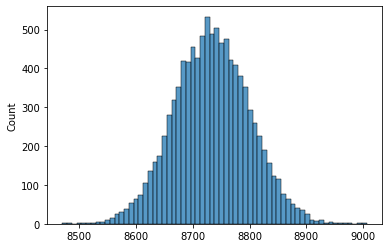

In [ ]:
# Survey Count : 10,000  Sample Count in each Survey : 5,000 :--: Calulating the mean for each survey(10,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for female
num_transact = 5000
num_people = 10000
female_sample_means = []
for person in range(num_people):
    female_sample = df_female["Purchase"].sample(num_transact)
    female_sample_mean = np.mean(female_sample)
    female_sample_means.append(female_sample_mean)
sns.histplot(female_sample_means)

In [ ]:
print("Mean of Sample_means and whole data for female : ",np.mean(female_sample_means), " , " , df_female['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for female : ",np.std(female_sample_means), " , ", df_female['Purchase'].std())
print("Standard Error for female : ", df_female['Purchase'].std()/m.sqrt(5000))

Mean of Sample_means and whole data for female :  8733.626175159998  ,  8734.565765155476
Standard Deviation for sample_means and whole data for female :  66.30007154733315  ,  4767.233289291458
Standard Error for female :  67.41885972712481


In [ ]:
obs_mean = df_female['Purchase'].mean()

left_90 =  - z90 * df_female['Purchase'].std()/m.sqrt(5000) + obs_mean
right_90 = z90 * df_female['Purchase'].std()/m.sqrt(5000) + obs_mean

left_95 =  - z95 * df_female['Purchase'].std()/m.sqrt(5000) + obs_mean
right_95 = z95 * df_female['Purchase'].std()/m.sqrt(5000) + obs_mean

left_99 =  - z99 * df_female['Purchase'].std()/m.sqrt(5000) + obs_mean
right_99 = z99 * df_female['Purchase'].std()/m.sqrt(5000) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 8734.565765155476 lies between [8623.661740904356, 8845.469789406596]
With 95% confidence interval, we can say that 8734.565765155476 lies between [8602.424800090312, 8866.70673022064]
With 99% confidence interval, we can say that 8734.565765155476 lies between [8560.894782498402, 8908.236747812549]


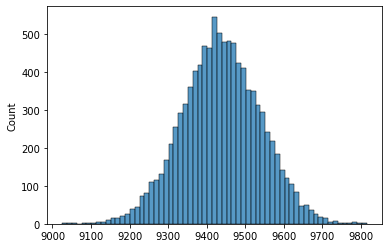

In [ ]:
# Survey Count : 10,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(10,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for male
num_transact = 2500
num_people = 10000
male_sample_means = []
for person in range(num_people):
    male_sample = df_male["Purchase"].sample(num_transact)
    male_sample_mean = np.mean(male_sample)
    male_sample_means.append(male_sample_mean)
sns.histplot(male_sample_means)

In [ ]:
print("Mean of Sample_means and whole data for male : ",np.mean(male_sample_means), " , " , df_male['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for male : ",np.std(male_sample_means), " , ", df_male['Purchase'].std())
print("Standard Error for male : " , df_male['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for male :  9437.2397892  ,  9437.526040472265
Standard Deviation for sample_means and whole data for male :  101.21494061542549  ,  5092.18620977797
Standard Error for male :  101.8437241955594


In [ ]:
obs_mean = df_male['Purchase'].mean()

left_90 =  - z90 * df_male['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_male['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_male['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_male['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_male['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_male['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9437.526040472265 lies between [9269.99311417057, 9605.05896677396]
With 95% confidence interval, we can say that 9437.526040472265 lies between [9237.912341048968, 9637.139739895561]
With 99% confidence interval, we can say that 9437.526040472265 lies between [9175.176606944504, 9699.875474000026]


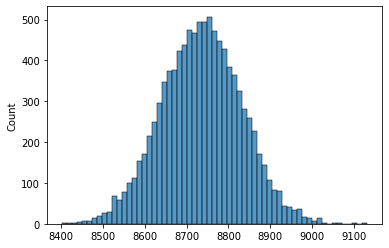

In [ ]:
# Survey Count : 10,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(10,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for female
num_transact = 2500
num_people = 10000
female_sample_means = []
for person in range(num_people):
    female_sample = df_female["Purchase"].sample(num_transact)
    female_sample_mean = np.mean(female_sample)
    female_sample_means.append(female_sample_mean)
sns.histplot(female_sample_means)

In [ ]:
print("Mean of Sample_means and whole data for female : ",np.mean(female_sample_means), " , " , df_female['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for female : ",np.std(female_sample_means), " , ", df_female['Purchase'].std())
print("Standard Error for female : ", df_female['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for female :  8733.626175159998  ,  8734.565765155476
Standard Deviation for sample_means and whole data for female :  66.30007154733315  ,  4767.233289291458
Standard Error for female :  95.34466578582916


In [ ]:
obs_mean = df_female['Purchase'].mean()

left_90 =  - z90 * df_female['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_female['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_female['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_female['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_female['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_female['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 8734.565765155476 lies between [8577.723789937787, 8891.407740373164]
With 95% confidence interval, we can say that 8734.565765155476 lies between [8547.69022021525, 8921.4413100957]
With 99% confidence interval, we can say that 8734.565765155476 lies between [8488.95790609118, 8980.173624219771]


For Male with 5000 sample size,

 > With 90% confidence interval, we can say that 9437.526040472265 lies between [9319.062372212311, 9555.989708732219] \
With 95% confidence interval, we can say that 9437.526040472265 lies between [9296.37783999232, 9578.67424095221] \
With 99% confidence interval, we can say that 9437.526040472265 lies between [9252.016976984336, 9623.035103960194]

For Female with 5000 sample size,
> With 90% confidence interval, we can say that 8734.565765155476 lies between [8623.661740904356, 8845.469789406596] \
With 95% confidence interval, we can say that 8734.565765155476 lies between [8602.424800090312, 8866.70673022064] \
With 99% confidence interval, we can say that 8734.565765155476 lies between [8560.894782498402, 8908.236747812549]

For Male with 2500 sample size,

 > With 90% confidence interval, we can say that 9437.526040472265 lies between [9269.99311417057, 9605.05896677396] \
With 95% confidence interval, we can say that 9437.526040472265 lies between [9237.912341048968, 9637.139739895561] \
With 99% confidence interval, we can say that 9437.526040472265 lies between [9175.176606944504, 9699.875474000026]

For Female with 2500 sample size,
> With 90% confidence interval, we can say that 8734.565765155476 lies between [8577.723789937787, 8891.407740373164] \
With 95% confidence interval, we can say that 8734.565765155476 lies between [8547.69022021525, 8921.4413100957] \
With 99% confidence interval, we can say that 8734.565765155476 lies between [8488.95790609118, 8980.173624219771] \

**We can clearly say that the average spending(per transaction) for male is more compared to female since there is no overlap of confidence interval with a gap of 200.** 

In [ ]:
# Seperate datasets for single and married as df_single and df_married respectively and Calculating confidence interval for the average transaction value for single and married
df_single = df[df['Marital_Status'] == 0]
df_married = df[df['Marital_Status'] == 1]

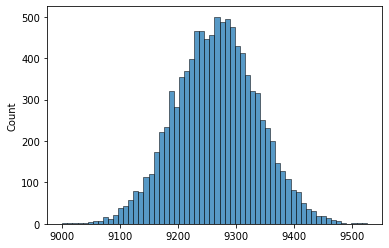

In [ ]:
# Survey Count : 10,000  Sample Count in each Survey : 5,000 :--: Calulating the mean for each survey(10,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for Single
num_transact = 5000
num_people = 10000
single_sample_means = []
for person in range(num_people):
    single_sample = df_single["Purchase"].sample(num_transact)
    single_sample_mean = np.mean(single_sample)
    single_sample_means.append(single_sample_mean)
sns.histplot(single_sample_means)

In [ ]:
print("Mean of Sample_means and whole data for single : ",np.mean(single_sample_means), " , " , df_single['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for single : ",np.std(single_sample_means), " , ", df_single['Purchase'].std())
print("Standard Error for male : " , df_single['Purchase'].std()/m.sqrt(5000))

Mean of Sample_means and whole data for single :  9265.73516838  ,  9265.907618921507
Standard Deviation for sample_means and whole data for single :  70.75766686521072  ,  5027.347858674449
Standard Error for male :  71.09743524504744


In [ ]:
obs_mean = df_single['Purchase'].mean()

left_90 =  - z90 * df_single['Purchase'].std()/m.sqrt(5000) + obs_mean
right_90 = z90 * df_single['Purchase'].std()/m.sqrt(5000) + obs_mean

left_95 =  - z95 * df_single['Purchase'].std()/m.sqrt(5000) + obs_mean
right_95 = z95 * df_single['Purchase'].std()/m.sqrt(5000) + obs_mean

left_99 =  - z99 * df_single['Purchase'].std()/m.sqrt(5000) + obs_mean
right_99 = z99 * df_single['Purchase'].std()/m.sqrt(5000) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9265.907618921507 lies between [9148.952337943403, 9382.86289989961]
With 95% confidence interval, we can say that 9265.907618921507 lies between [9126.556645841214, 9405.2585920018]
With 99% confidence interval, we can say that 9265.907618921507 lies between [9082.760625730265, 9449.054612112748]


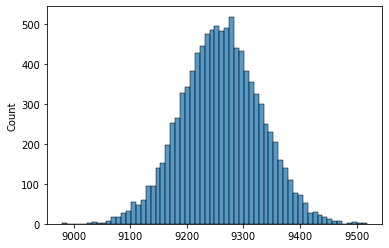

In [ ]:
# Survey Count : 10,000  Sample Count in each Survey : 5,000 :--: Calulating the mean for each survey(10,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for Married
num_transact = 5000
num_people = 10000
mar_sample_means = []
for person in range(num_people):
    mar_sample = df_married["Purchase"].sample(num_transact)
    mar_sample_mean = np.mean(mar_sample)
    mar_sample_means.append(mar_sample_mean)
sns.histplot(mar_sample_means)

In [ ]:
print("Mean of Sample_means and whole data for married : ",np.mean(mar_sample_means), " , " , df_married['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for married : ",np.std(mar_sample_means), " , ", df_married['Purchase'].std())
print("Standard Error for male : " , df_married['Purchase'].std()/m.sqrt(5000))

Mean of Sample_means and whole data for married :  9260.66162662  ,  9261.174574082374
Standard Deviation for sample_means and whole data for married :  69.57676896271042  ,  5016.897377793055
Standard Error for male :  70.94964312708956


In [ ]:
obs_mean = df_married['Purchase'].mean()

left_90 =  - z90 * df_married['Purchase'].std()/m.sqrt(5000) + obs_mean
right_90 = z90 * df_married['Purchase'].std()/m.sqrt(5000) + obs_mean

left_95 =  - z95 * df_married['Purchase'].std()/m.sqrt(5000) + obs_mean
right_95 = z95 * df_married['Purchase'].std()/m.sqrt(5000) + obs_mean

left_99 =  - z99 * df_married['Purchase'].std()/m.sqrt(5000) + obs_mean
right_99 = z99 * df_married['Purchase'].std()/m.sqrt(5000) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9261.174574082374 lies between [9144.462411138311, 9377.886737026436]
With 95% confidence interval, we can say that 9261.174574082374 lies between [9122.113273553277, 9400.23587461147]
With 99% confidence interval, we can say that 9261.174574082374 lies between [9078.40829338699, 9443.940854777757]


For Single with 5000 sample size,

 > With 90% confidence interval, we can say that 9265.907618921507 lies between [9148.952337943403, 9382.86289989961] \
With 95% confidence interval, we can say that 9265.907618921507 lies between [9126.556645841214, 9405.2585920018] \
With 99% confidence interval, we can say that 9265.907618921507 lies between [9082.760625730265, 9449.054612112748]

For Married with 5000 sample size,
> With 90% confidence interval, we can say that 9261.174574082374 lies between [9144.462411138311, 9377.886737026436] \
With 95% confidence interval, we can say that 9261.174574082374 lies between [9122.113273553277, 9400.23587461147] \
With 99% confidence interval, we can say that 9261.174574082374 lies between [9078.40829338699, 9443.940854777757]


**We can clearly say that the average spending(per transaction) for both Single and married is almost same and there is a clear overlap of the confidence intervals as well.**

In [ ]:
# Seperate datasets for seperate age groups and Calculating confidence interval for the average transaction value forthe age groups.
df_0_17 = df[df['Age'] == '0-17']
df_18_25 = df[df['Age'] == '18-25']
df_26_35 = df[df['Age'] == '26-35']
df_36_45 = df[df['Age'] == '36-45']
df_46_50 = df[df['Age'] == '46-50']
df_51_55 = df[df['Age'] == '51-55']
df_55 = df[df['Age'] == '55+']

In [ ]:
print(df_0_17.shape , df_18_25.shape , df_26_35.shape , df_36_45.shape ,df_46_50.shape , df_51_55.shape , df_55.shape)

(15102, 10) (99660, 10) (219587, 10) (110013, 10) (45701, 10) (38501, 10) (21504, 10)


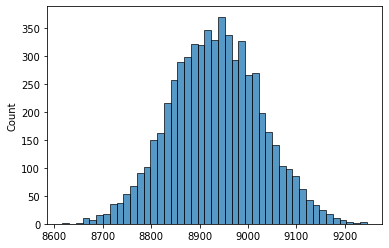

In [ ]:
# Survey Count : 6,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(6,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for the age group 0 - 17
num_transact = 2500
num_people = 6000
sample_means_0 = []
for person in range(num_people):
    sample_0 = df_0_17["Purchase"].sample(num_transact)
    sample_mean_0 = np.mean(sample_0)
    sample_means_0.append(sample_mean_0)
sns.histplot(sample_means_0)

In [ ]:
print("Mean of Sample_means and whole data for age category 0-17 : ",np.mean(sample_means_0), " , " , df_0_17['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for age category 0-17 : ",np.std(sample_means_0), " , ", df_0_17['Purchase'].std())
print("Standard Error for age category 0-17 : " , df_0_17['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for age category 0-17 :  8932.4088  ,  8933.464640444974
Standard Deviation for sample_means and whole data for age category 0-17 :  93.62496733250649  ,  5111.11404600277
Standard Error for age category 0-17 :  102.2222809200554


In [ ]:
obs_mean = df_0_17['Purchase'].mean()

left_90 =  - z90 * df_0_17['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_0_17['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_0_17['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_0_17['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_0_17['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_0_17['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 8933.464640444974 lies between [8765.308988331482, 9101.620292558466]
With 95% confidence interval, we can say that 8933.464640444974 lies between [8733.108969841665, 9133.820311048283]
With 99% confidence interval, we can say that 8933.464640444974 lies between [8670.14004479491, 9196.789236095037]


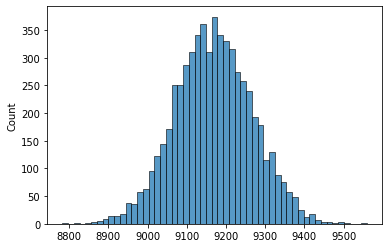

In [ ]:
# Survey Count : 6,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(6,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for the age group 18 - 25
num_transact = 2500
num_people = 6000
sample_means_18 = []
for person in range(num_people):
    sample_18 = df_18_25["Purchase"].sample(num_transact)
    sample_mean_18 = np.mean(sample_18)
    sample_means_18.append(sample_mean_18)
sns.histplot(sample_means_18)

In [ ]:
print("Mean of Sample_means and whole data for age category 18-25 : ",np.mean(sample_means_18), " , " , df_18_25['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for age category 18-25 : ",np.std(sample_means_18), " , ", df_18_25['Purchase'].std())
print("Standard Error for age category 18-25 : " , df_18_25['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for age category 18-25 :  9168.049708800001  ,  9169.663606261289
Standard Deviation for sample_means and whole data for age category 18-25 :  98.61398975759143  ,  5034.32199717658
Standard Error for age category 18-25 :  100.68643994353161


In [ ]:
obs_mean = df_18_25['Purchase'].mean()

left_90 =  - z90 * df_18_25['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_18_25['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_18_25['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_18_25['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_18_25['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_18_25['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9169.663606261289 lies between [9004.03441255418, 9335.292799968398]
With 95% confidence interval, we can say that 9169.663606261289 lies between [8972.318183971967, 9367.00902855061]
With 99% confidence interval, we can say that 9169.663606261289 lies between [8910.295336966752, 9429.031875555826]


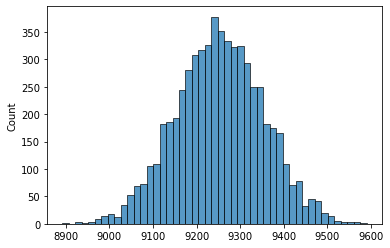

In [ ]:
# Survey Count : 6,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(6,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for the age group 26 - 35
num_transact = 2500
num_people = 6000
sample_means_26 = []
for person in range(num_people):
    sample_26 = df_26_35["Purchase"].sample(num_transact)
    sample_mean_26 = np.mean(sample_26)
    sample_means_26.append(sample_mean_26)
sns.histplot(sample_means_26)

In [ ]:
print("Mean of Sample_means and whole data for age category 26-35 : ",np.mean(sample_means_26), " , " , df_26_35['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for age category 26-35 : ",np.std(sample_means_26), " , ", df_26_35['Purchase'].std())
print("Standard Error for age category 26-35 : " , df_26_35['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for age category 26-35 :  9252.705032133334  ,  9252.690632869888
Standard Deviation for sample_means and whole data for age category 26-35 :  100.18369149648542  ,  5010.527303002956
Standard Error for age category 26-35 :  100.21054606005912


In [ ]:
obs_mean = df_26_35['Purchase'].mean()

left_90 =  - z90 * df_26_35['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_26_35['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_26_35['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_26_35['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_26_35['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_26_35['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9252.690632869888 lies between [9087.844284601091, 9417.536981138684]
With 95% confidence interval, we can say that 9252.690632869888 lies between [9056.277962592172, 9449.103303147604]
With 99% confidence interval, we can say that 9252.690632869888 lies between [8994.548266219175, 9510.8329995206]


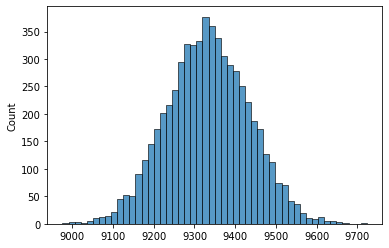

In [ ]:
# Survey Count : 6,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(6,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for the age group 36 - 45
num_transact = 2500
num_people = 6000
sample_means_36 = []
for person in range(num_people):
    sample_36 = df_36_45["Purchase"].sample(num_transact)
    sample_mean_36 = np.mean(sample_36)
    sample_means_36.append(sample_mean_36)
sns.histplot(sample_means_36)

In [ ]:
print("Mean of Sample_means and whole data for age category 36-45 : ",np.mean(sample_means_36), " , " , df_36_45['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for age category 36-45 : ",np.std(sample_means_36), " , ", df_36_45['Purchase'].std())
print("Standard Error for age category 36-45 : " , df_36_45['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for age category 36-45 :  9332.060851133334  ,  9331.350694917874
Standard Deviation for sample_means and whole data for age category 36-45 :  101.09252142006693  ,  5022.923879204662
Standard Error for age category 36-45 :  100.45847758409323


In [ ]:
obs_mean = df_36_45['Purchase'].mean()

left_90 =  - z90 * df_36_45['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_36_45['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_36_45['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_36_45['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_36_45['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_36_45['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9331.350694917874 lies between [9166.09649929204, 9496.604890543707]
With 95% confidence interval, we can say that 9331.350694917874 lies between [9134.452078853052, 9528.249310982696]
With 99% confidence interval, we can say that 9331.350694917874 lies between [9072.56965666125, 9590.131733174498]


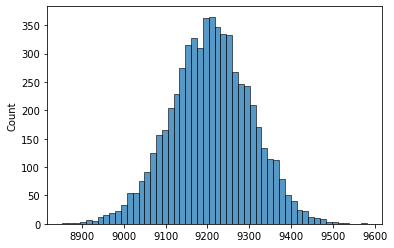

In [ ]:
# Survey Count : 6,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(6,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for the age group 46 - 50
num_transact = 2500
num_people = 6000
sample_means_46 = []
for person in range(num_people):
    sample_46 = df_46_50["Purchase"].sample(num_transact)
    sample_mean_46 = np.mean(sample_46)
    sample_means_46.append(sample_mean_46)
sns.histplot(sample_means_46)

In [ ]:
print("Mean of Sample_means and whole data for age category 46-50 : ",np.mean(sample_means_46), " , " , df_46_50['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for age category 46-50 : ",np.std(sample_means_46), " , ", df_46_50['Purchase'].std())
print("Standard Error for age category 46-50 : " , df_46_50['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for age category 46-50 :  9207.884877066666  ,  9208.625697468327
Standard Deviation for sample_means and whole data for age category 46-50 :  96.06047384631292  ,  4967.216367142941
Standard Error for age category 46-50 :  99.34432734285882


In [ ]:
obs_mean = df_46_50['Purchase'].mean()

left_90 =  - z90 * df_46_50['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_46_50['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_46_50['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_46_50['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_46_50['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_46_50['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9208.625697468327 lies between [9045.204278989324, 9372.04711594733]
With 95% confidence interval, we can say that 9208.625697468327 lies between [9013.910815876325, 9403.34057906033]
With 99% confidence interval, we can say that 9208.625697468327 lies between [8952.714710233124, 9464.536684703531]


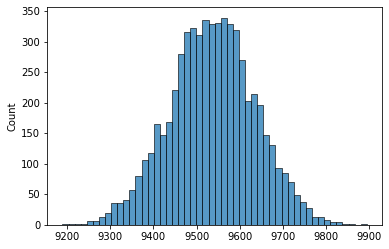

In [ ]:
# Survey Count : 6,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(6,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for the age group 51 - 55
num_transact = 2500
num_people = 6000
sample_means_51 = []
for person in range(num_people):
    sample_51 = df_51_55["Purchase"].sample(num_transact)
    sample_mean_51 = np.mean(sample_51)
    sample_means_51.append(sample_mean_51)
sns.histplot(sample_means_51)

In [ ]:
print("Mean of Sample_means and whole data for age category 51-55 : ",np.mean(sample_means_51), " , " , df_51_55['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for age category 51-55 : ",np.std(sample_means_51), " , ", df_51_55['Purchase'].std())
print("Standard Error for age category 51-55 : " , df_51_55['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for age category 51-55 :  9536.110395333333  ,  9534.808030960236
Standard Deviation for sample_means and whole data for age category 51-55 :  98.3519844019904  ,  5087.368079602135
Standard Error for age category 51-55 :  101.74736159204271


In [ ]:
obs_mean = df_51_55['Purchase'].mean()

left_90 =  - z90 * df_51_55['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_51_55['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_51_55['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_51_55['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_51_55['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_51_55['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9534.808030960236 lies between [9367.433621141325, 9702.182440779146]
With 95% confidence interval, we can say that 9534.808030960236 lies between [9335.383202239831, 9734.23285968064]
With 99% confidence interval, we can say that 9534.808030960236 lies between [9272.706827499134, 9796.909234421337]


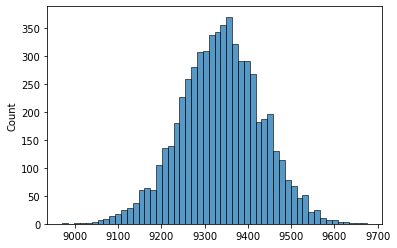

In [ ]:
# Survey Count : 6,000  Sample Count in each Survey : 2,500 :--: Calulating the mean for each survey(6,000) and plotting the histplot for values forms a normal distribution
# Confidence Interval for the age group 55+
num_transact = 2500
num_people = 6000
sample_means_55 = []
for person in range(num_people):
    sample_55 = df_55["Purchase"].sample(num_transact)
    sample_mean_55 = np.mean(sample_55)
    sample_means_55.append(sample_mean_55)
sns.histplot(sample_means_55)

In [ ]:
print("Mean of Sample_means and whole data for age category 55+ : ",np.mean(sample_means_55), " , " , df_55['Purchase'].mean())
print("Standard Deviation for sample_means and whole data for age category 55+ : ",np.std(sample_means_55), " , ", df_55['Purchase'].std())
print("Standard Error for age category 55+ : " , df_55['Purchase'].std()/m.sqrt(2500))

Mean of Sample_means and whole data for age category 55+ :  9336.868613133334  ,  9336.280459449405
Standard Deviation for sample_means and whole data for age category 55+ :  93.88403141726593  ,  5011.4939956034605
Standard Error for age category 55+ :  100.22987991206921


In [ ]:
obs_mean = df_55['Purchase'].mean()

left_90 =  - z90 * df_55['Purchase'].std()/m.sqrt(2500) + obs_mean
right_90 = z90 * df_55['Purchase'].std()/m.sqrt(2500) + obs_mean

left_95 =  - z95 * df_55['Purchase'].std()/m.sqrt(2500) + obs_mean
right_95 = z95 * df_55['Purchase'].std()/m.sqrt(2500) + obs_mean

left_99 =  - z99 * df_55['Purchase'].std()/m.sqrt(2500) + obs_mean
right_99 = z99 * df_55['Purchase'].std()/m.sqrt(2500) + obs_mean

print(f"With 90% confidence interval, we can say that {obs_mean} lies between [{left_90}, {right_90}]")
print(f"With 95% confidence interval, we can say that {obs_mean} lies between [{left_95}, {right_95}]")
print(f"With 99% confidence interval, we can say that {obs_mean} lies between [{left_99}, {right_99}]")

With 90% confidence interval, we can say that 9336.280459449405 lies between [9171.40230699405, 9501.158611904759]
With 95% confidence interval, we can say that 9336.280459449405 lies between [9139.829894821749, 9532.73102407706]
With 99% confidence interval, we can say that 9336.280459449405 lies between [9078.088288795914, 9594.472630102895]


For Age Group of 0 - 17 with 5000 sample size,

 > With 90% confidence interval, we can say that 8933.464640444974 lies between [8765.308988331482, 9101.620292558466] \
With 95% confidence interval, we can say that 8933.464640444974 lies between [8733.108969841665, 9133.820311048283] \
With 99% confidence interval, we can say that 8933.464640444974 lies between [8670.14004479491, 9196.789236095037]

For Age Group of 18 - 25 with 5000 sample size,

> With 90% confidence interval, we can say that 9169.663606261289 lies between [9004.03441255418, 9335.292799968398] \
With 95% confidence interval, we can say that 9169.663606261289 lies between [8972.318183971967, 9367.00902855061] \
With 99% confidence interval, we can say that 9169.663606261289 lies between [8910.295336966752, 9429.031875555826]

For Age Group of 26 - 35 with 5000 sample size,

 > With 90% confidence interval, we can say that 9252.690632869888 lies between [9087.844284601091, 9417.536981138684] \
With 95% confidence interval, we can say that 9252.690632869888 lies between [9056.277962592172, 9449.103303147604] \
With 99% confidence interval, we can say that 9252.690632869888 lies between [8994.548266219175, 9510.8329995206]

 For Age Group of 36 - 45 with 5000 sample size,

 > With 90% confidence interval, we can say that 9331.350694917874 lies between [9166.09649929204, 9496.604890543707] \
With 95% confidence interval, we can say that 9331.350694917874 lies between [9134.452078853052, 9528.249310982696] \
With 99% confidence interval, we can say that 9331.350694917874 lies between [9072.56965666125, 9590.131733174498]

 For Age Group of 46 - 50 with 5000 sample size,

 > With 90% confidence interval, we can say that 9208.625697468327 lies between [9045.204278989324, 9372.04711594733] \
With 95% confidence interval, we can say that 9208.625697468327 lies between [9013.910815876325, 9403.34057906033] \
With 99% confidence interval, we can say that 9208.625697468327 lies between [8952.714710233124, 9464.536684703531]

 For Age Group of 51 - 55 with 5000 sample size,

 > With 90% confidence interval, we can say that 9534.808030960236 lies between [9367.433621141325, 9702.182440779146] \
With 95% confidence interval, we can say that 9534.808030960236 lies between [9335.383202239831, 9734.23285968064] \
With 99% confidence interval, we can say that 9534.808030960236 lies between [9272.706827499134, 9796.909234421337]

 For Age Group of 55+ with 5000 sample size,

 > With 90% confidence interval, we can say that 9336.280459449405 lies between [9171.40230699405, 9501.158611904759] \
With 95% confidence interval, we can say that 9336.280459449405 lies between [9139.829894821749, 9532.73102407706] \
With 99% confidence interval, we can say that 9336.280459449405 lies between [9078.088288795914, 9594.472630102895]




*   **Age Group 0-17 have the lowest mean and confidence interval whereas the age group 51-55 have the highest mean and confidence interval**
*   **Age group 36-45 and 55+ ; 26-35 and 46-50 have similar mean and overlaping confidence intervals**



# Business Insights and Recommendations

**Insights:**
1.	Data Contains almost 70:30 ratio of male to female and 60:40 is the ratio of single to married.
2.	42:32:26 ratio of people from City Category B, C and A and almost 35% are living there for a year.
3.	Most bought product categories are 5, 1 and 8 with 27.4%, 25.5% and 20.71%.
4.	Age category representation of 18-25, 26-35 and 36-45 are 18%, 40% and 20% respectively
5.	For male customers the average spending on a product with 90% confidence interval, we can say that the average of 9437.526040472265 lies between [9319.062372212311, 9555.989708732219]
6.	For female customers the average spending on a product with 90% confidence interval, we can say that the average of 8734.565765155476 lies between [8623.661740904356, 8845.469789406596]
7.	We can clearly say that the average spending (per product) for male is more compared to female since there is no overlap of confidence interval with a gap of 200.
8.	For customers who are single, the average spending on a product with 90% confidence interval, we can say that the average of 9265.907618921507 lies between [9148.952337943403, 9382.86289989961]
9.	For customers who are married, the average spending on a product with 90% confidence interval, we can say that the average of 9261.174574082374 lies between [9144.462411138311, 9377.886737026436]
10.	 We can clearly say that the average spending (per product) for both Single and married is almost same and there is a clear overlap of the confidence intervals as well.
11.	 Age Group 0-17 have the lowest mean and confidence interval whereas the age group 51-55 have the highest mean and confidence interval
12.	 Age group 36-45 and 55+; 26-35 and 46-50 have similar mean and overlapping confidence intervals.


---



**Recommendations:**

1.	Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.
2.	Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.
3.	People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.
4.	We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid-range products to increase the sales.
5.	Most of the purchases are done by individuals in 26-35 age category. So, Company can focus on products most liked and bought categories. Recommending and push notifications related to that.
6.	The average spending on a product by male is more compared to female. So, Company can encourage female buyers by women related hashtags, themes and offers.
7.	We can see only few people have bought high priced products, so pushing notifications about those products to those specific people, increases the possibility of selling the product to the customer.
